# Primer corte del proyecto final de Estadística

### Tema de la BD: 
Precio de las Laptop. Los datos fueron obtenidos a traves del siguiente enlace: (https://www.kaggle.com/datasets/abdocan/laptop-prices)

### Integrantes:
- Carlos Daniel Largacha Leal  C312
- Gabriel Andrés Pla Lasa  C311

## Importación de las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import scipy.stats as stats


## 1. Carga de datos

In [2]:
laptop_data = pd.read_csv('laptop_prices.csv')

## 2. Análisis descriptivo de los datos

#### 2.1 Infomacion general del dataset

In [3]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

#### 2.2 Primeras filas del dataset

In [4]:
print(laptop_data.head())

  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

#### 2.3 Análisis de los datos numéricos

In [5]:
# Calcular la moda para cada columna y añadirla al resumen
mode_summary = laptop_data.mode().iloc[0]  # La moda puede tener múltiples valores; tomamos el primero
extended_summary = laptop_data.describe().transpose()

# Añadir una columna para la moda
extended_summary['mode'] = mode_summary

# Mostrar el resumen extendido
extended_summary


,count,mean,std,min,25%,50%,75%,max,mode
Inches,1275.0,15.022902,1.429470,10.10,14.0,15.60,15.60,18.4,15.6
Ram,1275.0,8.440784,5.097809,2.00,4.0,8.00,8.00,64.0,8.0
Weight,1275.0,2.040525,0.669196,0.69,1.5,2.04,2.31,4.7,2.2
Price_euros,1275.0,1134.969059,700.752504,174.00,609.0,989.00,1496.50,6099.0,1099.0
ScreenW,1275.0,1900.043922,493.346186,1366.00,1920.0,1920.00,1920.00,3840.0,1920.0
ScreenH,1275.0,1073.904314,283.883940,768.00,1080.0,1080.00,1080.00,2160.0,1080.0
CPU_freq,1275.0,2.302980,0.503846,0.90,2.0,2.50,2.70,3.6,2.5
PrimaryStorage,1275.0,444.517647,365.537726,8.00,256.0,256.00,512.00,2048.0,256.0
SecondaryStorage,1275.0,176.069020,415.960655,0.00,0.0,0.00,0.00,2048.0,0.0


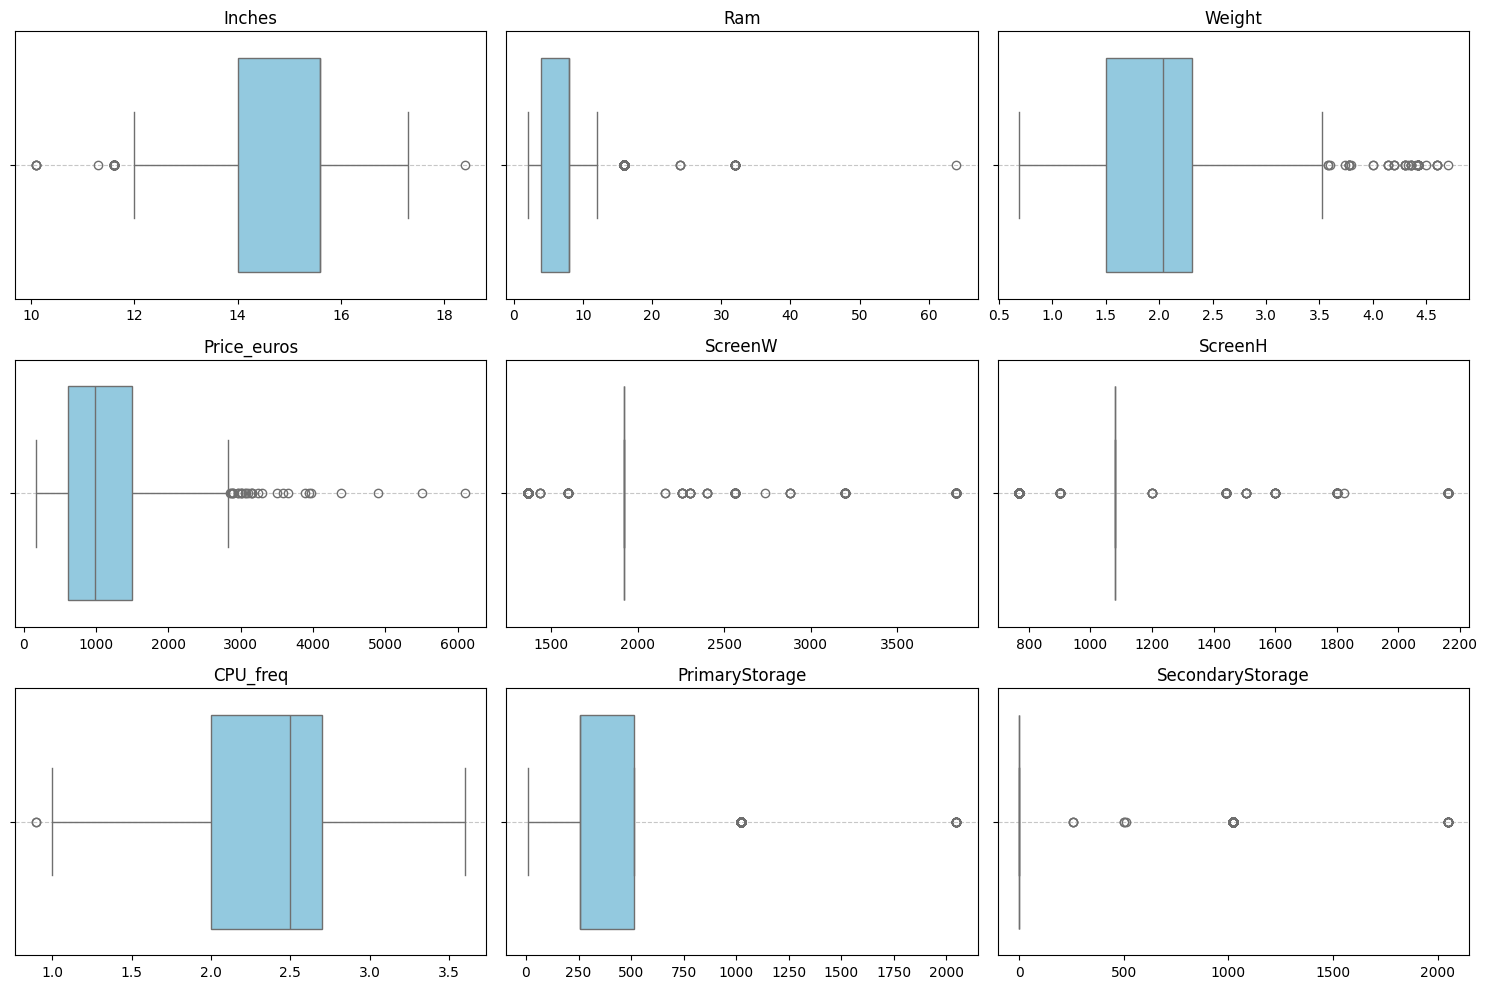

In [6]:
# Crear boxplots para cada columna numérica
numerical_columns = laptop_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=laptop_data, x=col, color='skyblue')
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


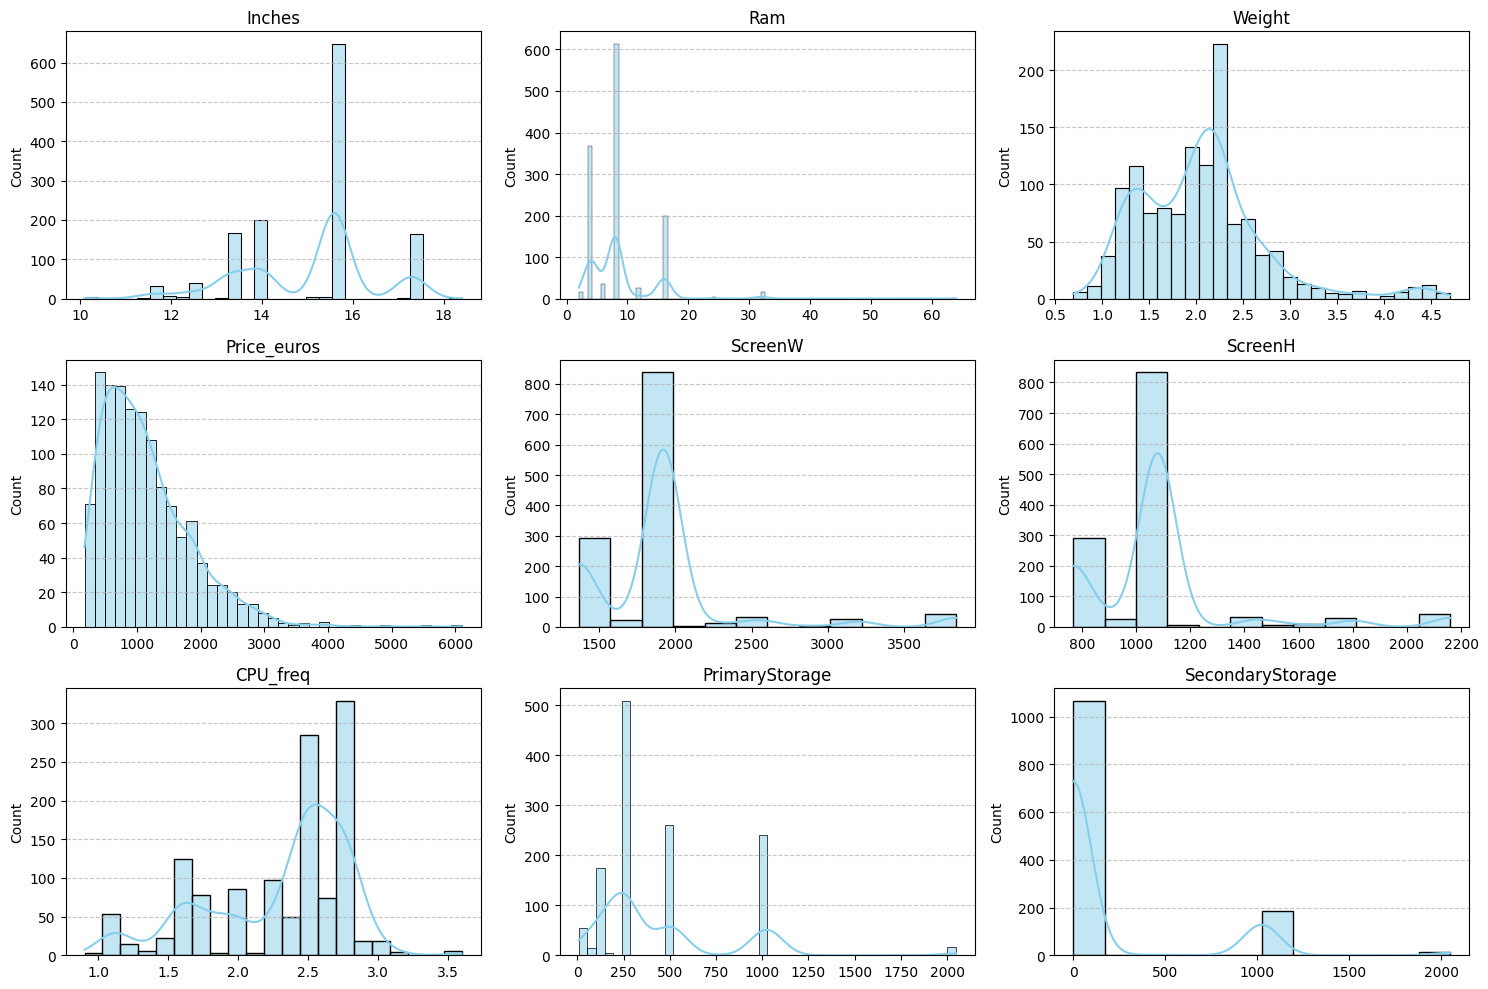

In [7]:
# Crear boxplots para cada columna numérica
numerical_columns = laptop_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=laptop_data, x=col, color='skyblue', kde=True)
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [8]:
def plot_histogram_and_boxplot(data, columns):
    """
    Genera un histograma y un boxplot para cada columna dada.

    Args:
    data (DataFrame): Dataset que contiene las columnas.
    columns (list): Lista de nombres de columnas a graficar.
    """
    for column in columns:
        if column not in data.columns:
            print(f"La columna '{column}' no existe en el dataset.")
            continue
        
        # Crear una figura con dos subplots
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        fig.suptitle(f'Análisis de {column}', fontsize=16)
        
        # Histograma
        sns.histplot(data[column], bins=30, kde=True, ax=axes[0], color="skyblue")
        axes[0].set_title(f'Histograma de {column}')
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Frecuencia')
        
        # Boxplot
        sns.boxplot(data[column], ax=axes[1], color="orange")
        axes[1].set_title(f'Boxplot de {column}')
        axes[1].set_xlabel(column)
        
        # Mostrar los gráficos
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta para no sobreponer el título
        plt.show()


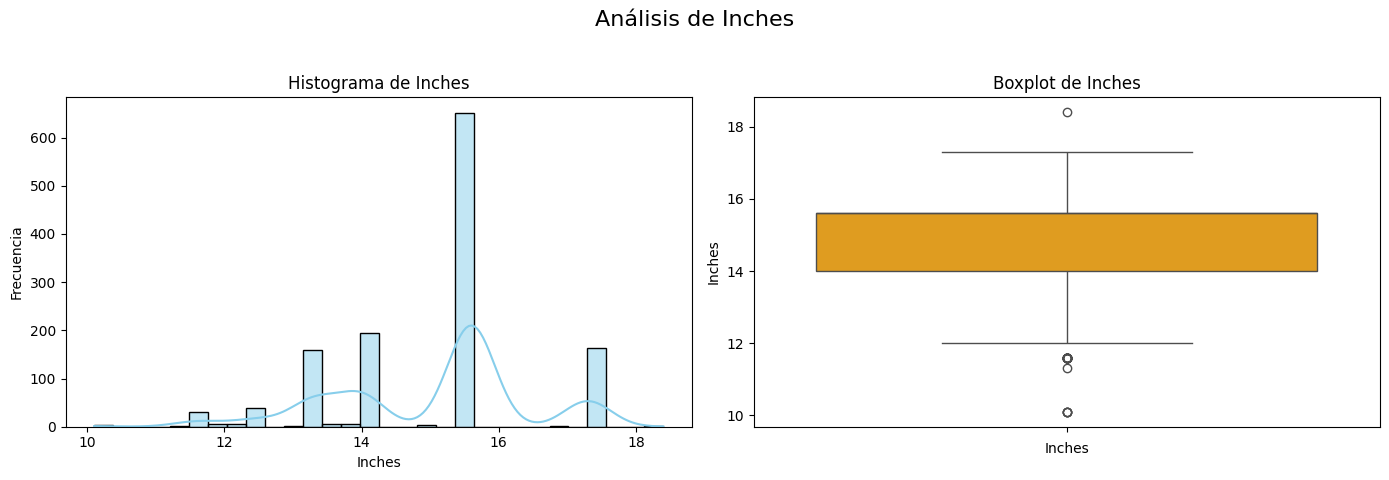

In [9]:
plot_histogram_and_boxplot(laptop_data, ['Inches'])

#### Inches (Tamaño de Pantalla)

- **Rango típico:** La mayoría de las laptops tienen tamaños de pantalla entre 13 y 15 pulgadas, lo que refleja una preferencia por tamaños estándar.  
- **Valores atípicos:** Se observan laptops pequeñas (11 pulgadas) y algunas significativamente grandes (17 pulgadas o más). Estos extremos suelen estar orientados a la portabilidad extrema (pequeñas) o al mercado de gaming/diseño (grandes).  
- **Distribución:** Leve sesgo hacia tamaños más pequeños, indicando que laptops más compactas son ligeramente más frecuentes.  

**Conclusión:** Los tamaños reflejan un equilibrio entre portabilidad y funcionalidad, con excepciones notables en ambos extremos.


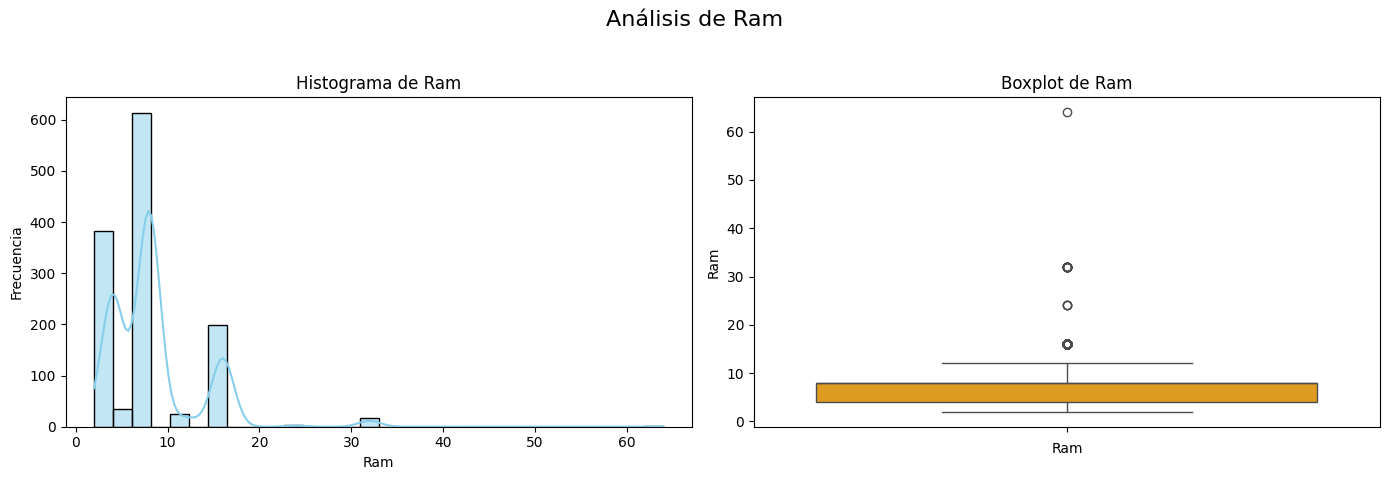

In [10]:
plot_histogram_and_boxplot(laptop_data, ['Ram'])

#### RAM

- **Rango típico:** La mayoría de las laptops tienen entre 8 GB y 16 GB de RAM, que es la configuración estándar en laptops modernas.  
- **Valores atípicos:** Se observan laptops con RAM alta (32 GB o 64 GB), típicas de estaciones de trabajo o gaming de alta gama.  
- **Distribución:** No hay un sesgo claro, pero los valores extremos resaltan el incremento en la demanda de RAM en modelos premium.  

**Conclusión:** El mercado parece centrado en configuraciones que equilibran precio y rendimiento, con opciones premium para usuarios más exigentes.


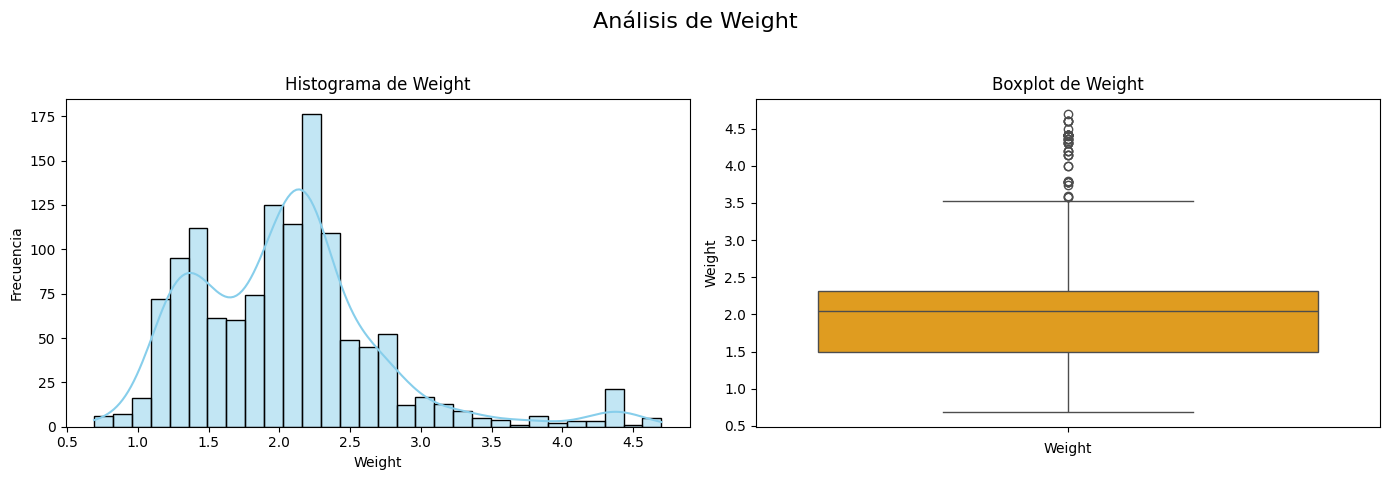

In [11]:
plot_histogram_and_boxplot(laptop_data, ['Weight'])

#### Weight (Peso)

- **Rango típico:** La mayoría de las laptops pesan entre 1 y 2 kg, lo que muestra una tendencia hacia la portabilidad.  
- **Valores atípicos:** Laptops ultraligeras (< 1 kg) o muy pesadas (> 2.5 kg), estas últimas suelen estar relacionadas con gaming o estaciones de trabajo.  
- **Distribución:** Sesgo leve hacia pesos más bajos, con más frecuencia en laptops ligeras.  

**Conclusión:** El peso de las laptops está diseñado para ser funcionalmente portátil, aunque las especializaciones en gaming y productividad aumentan el peso.


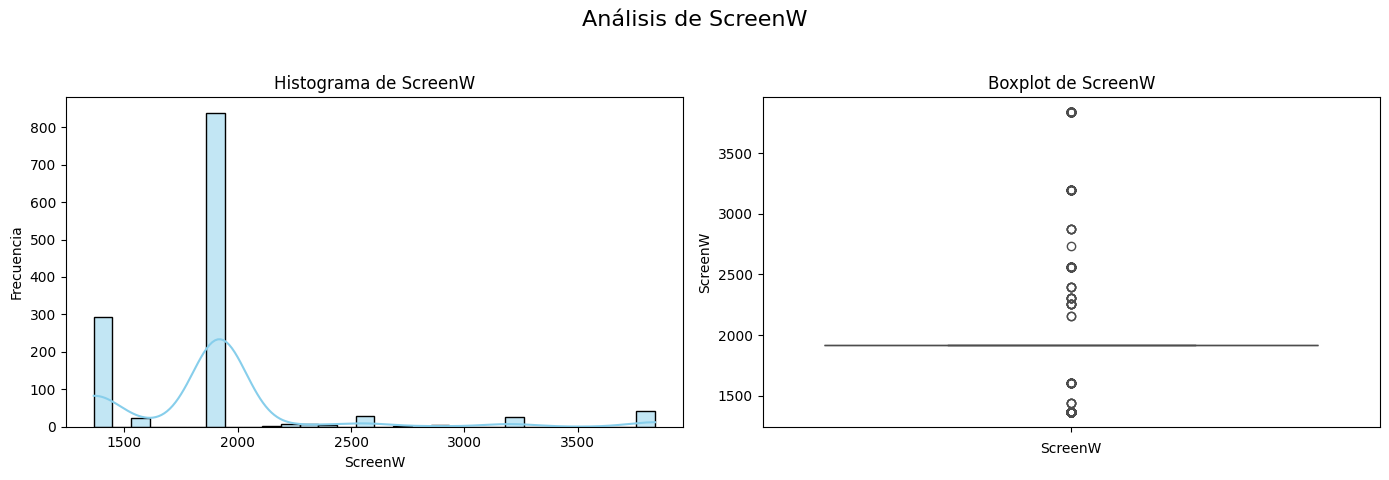

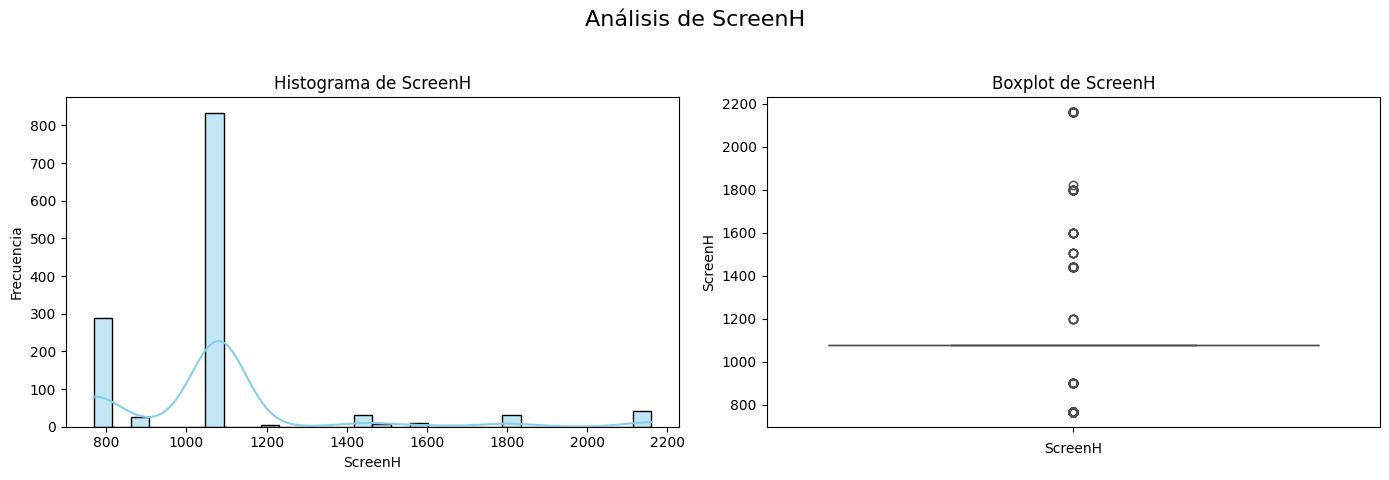

In [12]:
plot_histogram_and_boxplot(laptop_data, ['ScreenW', 'ScreenH'])

In [ ]:
(laptop_data['ScreenW'].value_counts(),laptop_data['ScreenH'].value_counts())

(1920    838
 1366    290
 3840     43
 2560     29
 3200     25
 1600     23
 2304      6
 2256      6
 1440      4
 2880      4
 2400      4
 2160      2
 2736      1
 Name: ScreenW, dtype: int64,
 1080    833
 768     290
 2160     43
 1440     31
 1800     29
 900      27
 1600     10
 1504      6
 1200      5
 1824      1
 Name: ScreenH, dtype: int64)

#### Screen Height y Width (Resolución de Pantalla)

- **Rango típico:** Resoluciones estándar Full HD (1920x1080) son las más comunes, con variaciones hacia resoluciones más altas en laptops premium.  
- **Valores atípicos:** Algunas laptops tienen resoluciones superiores (4K y más), destinadas a tareas profesionales o gaming.  
- **Distribución:** Las alturas y anchos tienden a alinearse proporcionalmente, con frecuencias más altas en relaciones estándar como 16:9.  

**Conclusión:** La resolución de pantalla se ajusta a estándares establecidos, con opciones de alta resolución como diferenciador en el mercado premium.


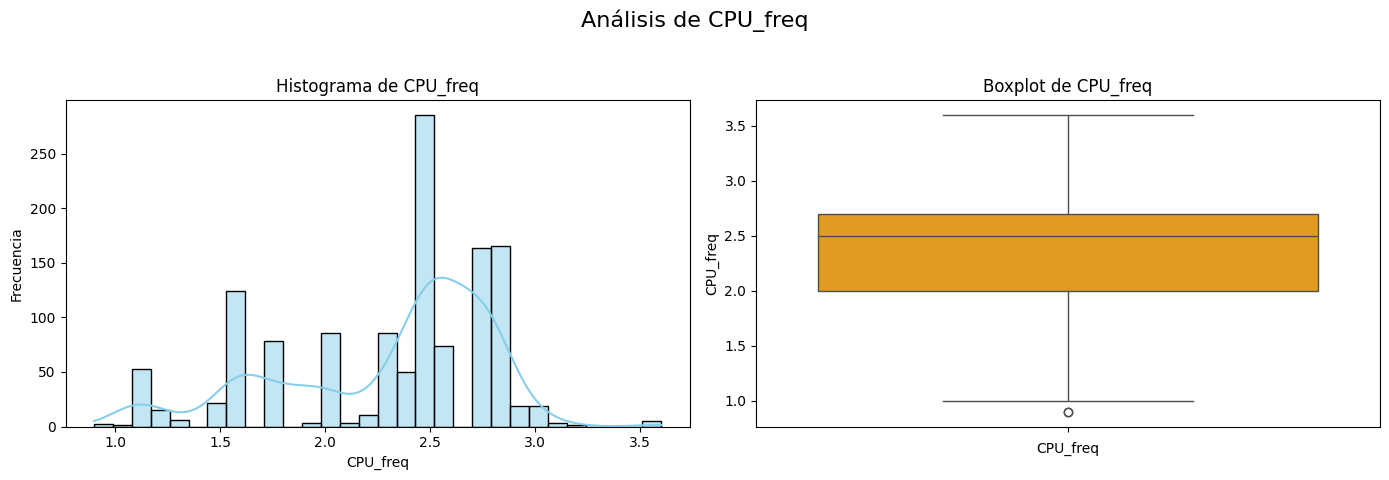

In [14]:
plot_histogram_and_boxplot(laptop_data, ['CPU_freq'])

#### Cpu_Freq (Frecuencia del Procesador)

- **Rango típico:** La mayoría de los procesadores tienen frecuencias entre 2.0 y 3.0 GHz.  
- **Valores atípicos:** Frecuencias superiores (> 4.0 GHz) son raras y corresponden a modelos de alto rendimiento.  
- **Distribución:** Los datos se concentran en valores intermedios, reflejando un equilibrio entre potencia y eficiencia energética.  

**Conclusión:** Las frecuencias de CPU están optimizadas para satisfacer tareas generales, con modelos específicos destacando por su velocidad.


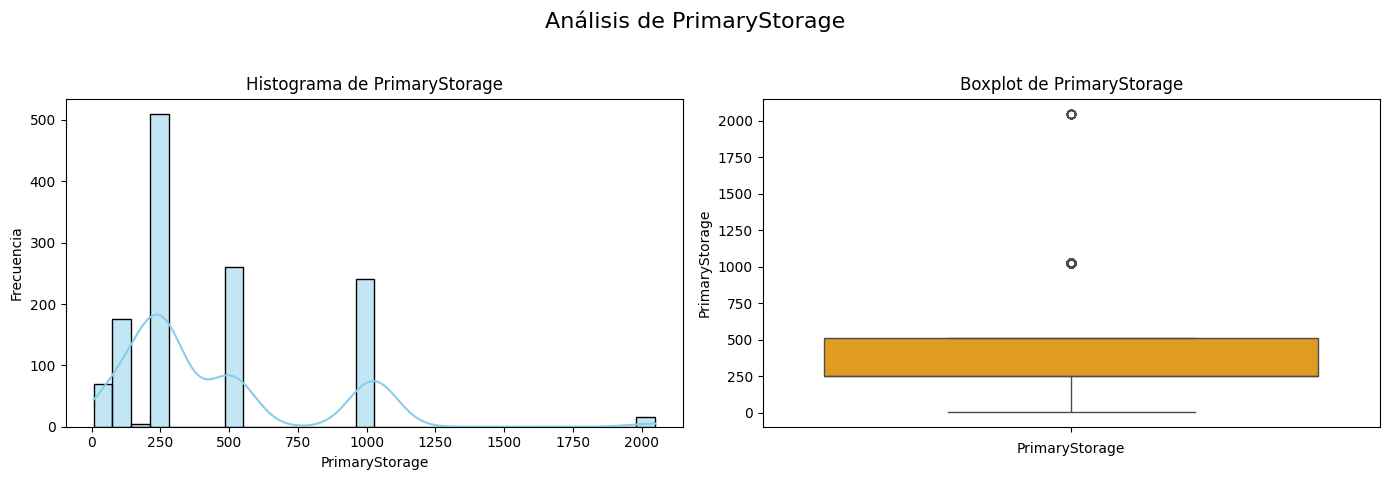

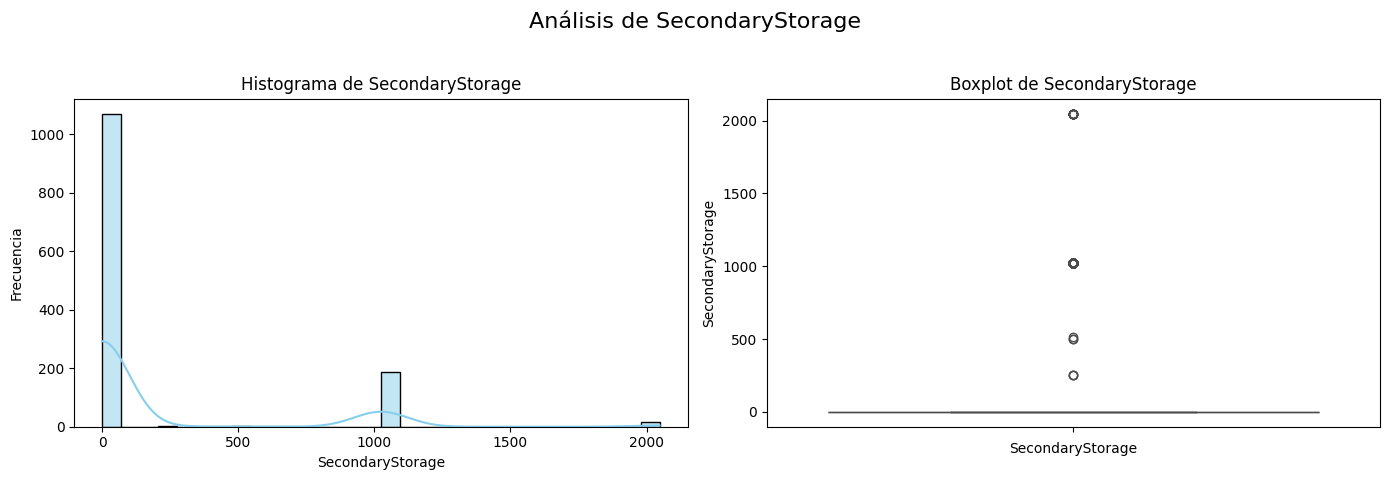

In [15]:
plot_histogram_and_boxplot(laptop_data, ['PrimaryStorage', 'SecondaryStorage'])

In [ ]:
(laptop_data['PrimaryStorageType'].value_counts(), laptop_data['SecondaryStorageType'].value_counts())

(SSD              837
 HDD              359
 Flash Storage     71
 Hybrid             8
 Name: PrimaryStorageType, dtype: int64,
 No        1067
 HDD        202
 SSD          4
 Hybrid       2
 Name: SecondaryStorageType, dtype: int64)

#### Primary Storage (Almacenamiento principal)

- **Rango típico:** Entre 256 GB y 512 GB (SSD) son los más frecuentes.  
- **Valores atípicos:** Modelos con almacenamiento de 1 TB o más, diseñados para usuarios que manejan grandes volúmenes de datos.  
- **Distribución:** Se observa una amplia variabilidad, indicando opciones diversas para necesidades específicas.  

**Conclusión:** Las laptops modernas tienden hacia discos SSD para el almacenamiento principal, con almacenamiento secundario siendo menos común y enfocado en necesidades específicas.

#### Secondary Storage (Almacenamiento secundario)

- **Rango típico:** Muchas laptops no tienen almacenamiento secundario. Aquellas que sí lo tienen suelen usar discos HDD de alta capacidad (> 1 TB).  
- **Distribución:** La presencia de almacenamiento secundario es menos común y depende del enfoque del modelo (gaming o estaciones de trabajo).  

**Conclusión:** Las laptops modernas tienden hacia discos SSD para el almacenamiento principal, con almacenamiento secundario siendo menos común y enfocado en necesidades específicas.


--- 

#### Conclusiones Generales

Los histogramas y boxplots revelan que las laptops están diseñadas principalmente para usuarios promedio, con especificaciones que equilibran funcionalidad y costo. Sin embargo, hay segmentos claros orientados a usuarios especializados, como gamers, profesionales creativos y usuarios que buscan portabilidad extrema.

---

### 2.4 Análisis de Columnas Categóricas

In [17]:
# Resumen para variables categóricas: número de valores únicos
categorical_summary = laptop_data.select_dtypes(include='object').nunique().to_frame(name='Unique Values')
categorical_summary

,Unique Values
Company,19
Product,618
TypeName,6
OS,9
Screen,4
Touchscreen,2
IPSpanel,2
RetinaDisplay,2
CPU_company,3
CPU_model,93


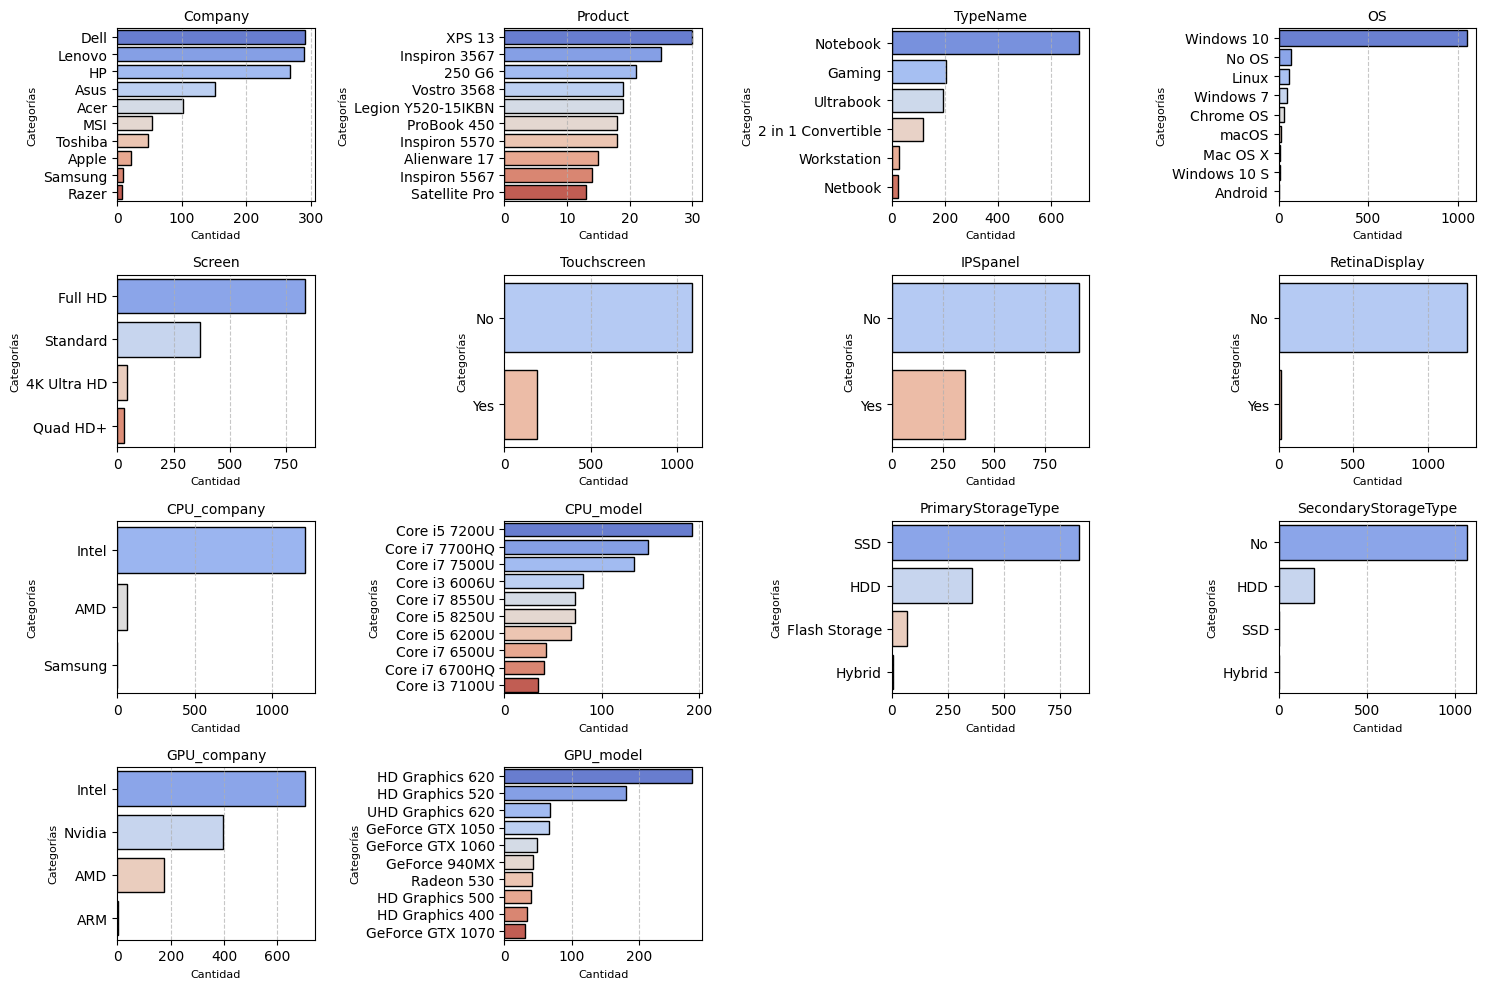

In [18]:
# Graficar los valores únicos de las columnas categóricas
categorical_columns = laptop_data.select_dtypes(include='object').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    unique_counts = laptop_data[col].value_counts().head(10)  # Top 10 categorías
    sns.barplot(
        y=unique_counts.index, 
        x=unique_counts.values, 
        palette='coolwarm', 
        edgecolor='black', 
        hue=unique_counts.index, 
        dodge=False 
    )
    plt.title(col, fontsize=10)
    plt.xlabel('Cantidad', fontsize=8)
    plt.ylabel('Categorías', fontsize=8)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


`1. Company`
- Las marcas más representadas son **HP**, **Dell** y **Lenovo**, lo que sugiere que estas dominan el mercado.  
- Marcas como **Apple** tienen una menor frecuencia, lo que podría deberse a su enfoque en un segmento premium o de nicho.  
- La diversidad de fabricantes es moderada, con varias marcas menos conocidas presentes, pero en menor proporción.  

`2. Product`
- La distribución está muy dispersa, con varios modelos específicos que aparecen una o dos veces.  
- Algunos modelos como **Inspiron** o **Pavilion** podrían destacar en frecuencia debido a su popularidad dentro de marcas como Dell o HP.  
- Esto refleja una alta variedad de opciones en el mercado, dificultando identificar líderes claros más allá de las marcas principales.  

`3. TypeName`
- Las categorías más comunes son **Notebook** y **Ultrabook**, lo que indica que el mercado está orientado hacia dispositivos portátiles ligeros y versátiles.  
- **Gaming** y **Workstation** son menos frecuentes, reflejando su enfoque en usuarios más especializados.  
- La categoría **2 in 1 Convertible** es notable, destacando la tendencia hacia dispositivos híbridos.  

`4. OS (Sistema Operativo)`
- Windows domina ampliamente, seguido por macOS. Esto confirma la popularidad de Windows en laptops comerciales y de uso general.  
- Otros sistemas como Linux o Chrome OS tienen una representación marginal, probablemente dirigidos a nichos específicos.  

`5. Screen (Resolución de pantalla)`
- Las resoluciones **Full HD (1920x1080)** son las más comunes, confirmando que este estándar satisface la mayoría de las necesidades de los usuarios.  
- Resoluciones más altas, como **4K**, aparecen menos frecuentemente, sugiriendo su asociación con dispositivos premium o de uso profesional.  
- Resoluciones más bajas (como 1366x768) aún están presentes, posiblemente en laptops más económicas o antiguas.  

`6. Touchscreen`
- La mayoría de las laptops no tienen pantallas táctiles, lo que podría reflejar un enfoque en dispositivos tradicionales.  
- Los dispositivos con pantallas táctiles están presentes, pero en menor proporción, probablemente en ultrabooks o modelos convertibles.  

`7. IPSpanel`
- La mayoría de las laptops no utilizan paneles IPS, lo que sugiere que los paneles estándar son suficientes para el consumidor promedio.  
- Los paneles IPS, más comunes en dispositivos premium o orientados al diseño gráfico, son menos frecuentes.  

`8. RetinaDisplay`
- La representación de pantallas Retina está limitada, lo cual es lógico, ya que este término está asociado exclusivamente con dispositivos Apple.  

`9. CPU_company`
- **Intel** domina ampliamente, seguido por **AMD** en una proporción significativamente menor.  
- Otras marcas son prácticamente inexistentes, lo que refleja la hegemonía de Intel y AMD en el mercado de procesadores para laptops.  

`10. CPU_model`
- Existe una gran diversidad de modelos de CPU, reflejando la segmentación del mercado según el rendimiento y el precio.  
- Modelos como **Core i5** e **i7** de Intel probablemente lideran, dado su equilibrio entre costo y rendimiento.  

`11. PrimaryStorageType`
- Los discos **SSD** dominan, indicando la transición generalizada hacia este tipo de almacenamiento por su velocidad y eficiencia.  
- Los HDD todavía están presentes, probablemente en laptops económicas o con grandes capacidades de almacenamiento.  

`12. SecondaryStorageType`
- Muchas laptops no tienen almacenamiento secundario, lo que sugiere una tendencia hacia configuraciones simplificadas con un solo tipo de almacenamiento.  
- Aquellas que tienen almacenamiento secundario tienden a usar HDD, probablemente para complementar el almacenamiento rápido del SSD.  

`13. GPU_company`
- **NVIDIA** domina en GPUs dedicadas, lo que refleja su liderazgo en el segmento de gaming y computación gráfica.  
- **Intel** lidera en GPUs integradas, siendo una opción estándar para tareas no intensivas.  
- AMD tiene una representación menor, pero aún relevante en el mercado de GPUs.  

`14. GPU_model`
- Hay una alta diversidad de modelos, lo que refleja un mercado segmentado según necesidades específicas de rendimiento gráfico.  
- Modelos básicos dominan, mientras que GPUs de gama alta, como las de la serie NVIDIA GTX/RTX, son menos frecuentes y probablemente están asociadas a laptops gaming o estaciones de trabajo.  


## 3. Analisis inferencial de los datos

#### 3.1 Análisis de los precios

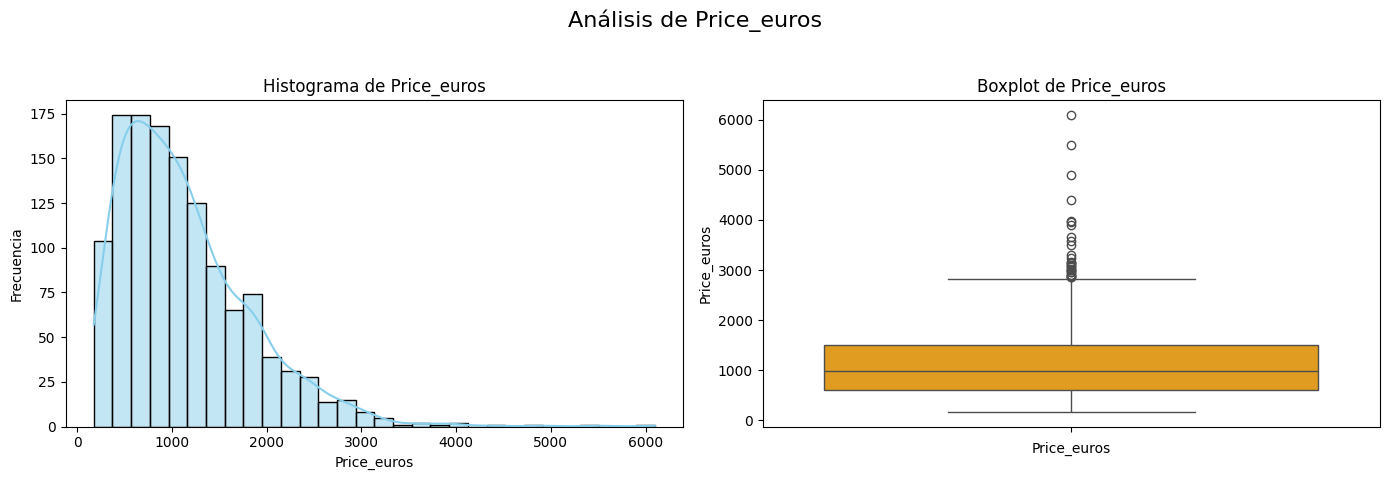

In [19]:
plot_histogram_and_boxplot(laptop_data, ['Price_euros'])

#### Histograma de `Price_euros`

- **Distribución asimétrica (sesgo positivo):**
  - El histograma muestra que la mayoría de los precios están concentrados en el rango entre 500 y 1500 euros.
  - La cola derecha indica la presencia de algunos laptops con precios significativamente más altos (modelos premium).

- **Densidad baja en precios altos:**
  - Hay una caída drástica en la frecuencia conforme los precios aumentan más allá de los 2000 euros, sugiriendo que estos modelos no son comunes en el mercado.

- **Pico en el rango intercuartílico (IQR):**
  - Los valores más densos parecen estar entre 800 y 1200 euros, que es el rango típico para laptops de gama media.

#### Boxplot  de `Price_euros`

- **Presencia de valores atípicos (outliers):**
  - Hay múltiples puntos fuera del límite superior del bigote, indicando modelos con precios excepcionalmente altos.
  - Estos valores atípicos representan laptops de alta gama, estaciones de trabajo o equipos diseñados para propósitos específicos como gaming extremo o edición profesional.

- **Rango intercuartílico (IQR):**
  - El rango típico de precios (IQR) está entre 500 y 1500 euros, lo que incluye la mayoría de las laptops estándar.

- **Mediana de precios:**
  - La línea dentro del box indica que la mediana de precios está por debajo del centro del IQR, lo que confirma un sesgo positivo.

- **Simetría del rango inferior:**
  - El bigote inferior está más cerca del rango intercuartílico, lo que refleja que hay pocos modelos con precios extremadamente bajos.


#### Distribución de `prices_euros`

Según el histograma de la columna `prices_euros`, parece que esta variable no sigue una distribución normal debido a su asimetría positiva (sesgo hacia la derecha). Sin embargo, con base en su forma, podría seguir una distribución Log-Normal.

**Características de la distribución Log-Normal:**
- Es común en datos de precios, ya que estos no pueden tomar valores negativos.
- La mayoría de los valores están concentrados en el rango más bajo, pero hay una cola larga hacia la derecha.

**Justificación:**
El histograma muestra una acumulación en los precios bajos (500-1500 euros) y una cola hacia precios más altos, lo cual es típico de esta distribución.


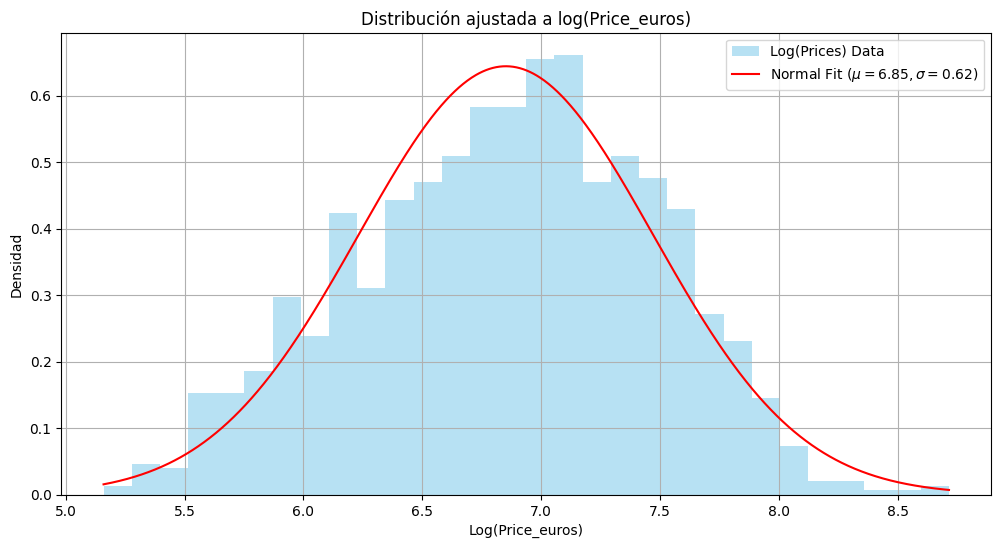

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrar valores de Price_euros
price_data = laptop_data['Price_euros'].dropna()

# Aplicar logaritmo natural para modelar como distribución log-normal
log_prices = np.log(price_data)

# Ajustar una distribución normal a los datos transformados
#mu, sigma = stats.norm.fit(log_prices)
mu = np.mean(log_prices)  # Estimador de la Media
sigma = np.sqrt(np.mean((log_prices - mu)**2))  # Estimador de la desviación estándar

# Graficar el ajuste
plt.figure(figsize=(12, 6))

# Histograma de los datos transformados
plt.hist(log_prices, bins=30, density=True, alpha=0.6, color='skyblue', label='Log(Prices) Data')

# Distribución ajustada
x = np.linspace(log_prices.min(), log_prices.max(), 1000)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r-', label=f'Normal Fit ($\mu={mu:.2f}, \sigma={sigma:.2f}$)')

plt.title("Distribución ajustada a log(Price_euros)")
plt.xlabel("Log(Price_euros)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()


#### Conclusiones de la distribución Log-Normal de `Price_euros` según el el análisis gráfico

Con base en el ajuste realizado, los datos transformados mediante el logaritmo natural (`log(Price_euros)`) parecen seguir una distribución normal razonablemente bien. Esto implica que los precios originales (`Price_euros`) se ajustan a una distribución log-normal.

Una distribución log-normal significa que los precios bajos son más frecuentes, mientras que los precios altos ocurren con menor frecuencia pero tienen un impacto significativo.

Este comportamiento es común en mercados donde los valores extremos (como laptops premium) tienen gran importancia en comparación con productos regulares.


#### Prueba de Bondad de Ajuste contra una Distribución Log-Normal

Entonces con el objetivo de corroborar lo concluido, se va realiza una prueba de bondad de ajuste contra una distribución log-normal. 

Para realizar la prueba, seguimos un enfoque similar al caso normal. Sin embargo, ajustamos los parámetros para la distribución log-normal y usamos estas estimaciones para calcular las frecuencias esperadas.

`Pasos para la prueba de bondad de ajuste para distribución log-normal`

1. **Definir hipótesis:**
    - $ H_0 $: Los datos de `prices_euros` siguen una distribución log-normal.
    - $ H_a $: Los datos de `prices_euros` no siguen una distribución log-normal.

2. **Método:**
    - Transformar los datos con logaritmo natural: $ \log(prices\_euros) $.
    - Estimar los parámetros $ \mu $ (media logarítmica) y $ \sigma $ (desviación estándar logarítmica) de los datos transformados.
    - Dividir los datos originales en intervalos (bins) y calcular las frecuencias observadas.
    - Calcular las frecuencias esperadas usando la función de densidad acumulada (CDF) de la distribución log-normal.
    - Calcular el estadístico de prueba $ \chi^2 $:
    
    $$
    \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
    $$

3. **Grados de libertad:**
    - Grados de libertad = Número de bins - 1 - Número de parámetros estimados (en este caso, $ \mu $ y $ \sigma $).


In [21]:
# Transformar datos al espacio logarítmico
log_prices = np.log(price_data)

# Estimar parámetros de la distribución log-normal
mu, sigma = np.mean(log_prices), np.std(log_prices)

# Generar frecuencias observadas
observed, bins = np.histogram(price_data, bins=10)  # 10 bins arbitrarios

# Calcular frecuencias esperadas usando CDF de log-normal
expected = len(price_data) * np.diff(stats.lognorm.cdf(bins, s=sigma, scale=np.exp(mu)))

# Calcular estadístico chi-cuadrado
chi_squared = np.sum((observed - expected)**2 / expected)

# Grados de libertad
df = len(bins) - 1 - 2  # 2 parámetros estimados: mu y sigma

# Valor p
p_value = stats.chi2.sf(chi_squared, df)

# Resultados
print("Estadístico chi-cuadrado:", chi_squared)
print("Grados de libertad:", df)
print("Valor p:", p_value)

if p_value > 0.05:
    print("No se rechaza H0: Los datos podrían seguir una distribución log-normal.")
else:
    print("Se rechaza H0: Los datos no siguen una distribución log-normal.")


Estadístico chi-cuadrado: 15.817895903424303
Grados de libertad: 8
Valor p: 0.045061994797469376
Se rechaza H0: Los datos no siguen una distribución log-normal.


`Pasos para la prueba de bondad de ajuste Kolmogorov-Smirnov (KS)`

1. **Definir hipótesis:**
   - \( H_0 \): Los datos de `prices_euros` siguen una distribución log-normal.
   - \( H_a \): Los datos de `prices_euros` no siguen una distribución log-normal.

2. **Método:**
   - Transformar los datos al espacio logarítmico con \( \log(\text{prices\_euros}) \).
   - Estimar los parámetros \( \mu \) (media logarítmica) y \( \sigma \) (desviación estándar logarítmica) de los datos transformados.
   - Definir la CDF teórica de la distribución log-normal ajustada, utilizando \( \mu \) y \( \sigma \).
   - Comparar la CDF empírica de los datos con la CDF teórica mediante el estadístico de prueba KS:
     
     \[
     D = \max | F_{\text{empírica}}(x) - F_{\text{teórica}}(x) |
     \]
   - Calcular el valor \( p \), que mide la probabilidad de observar un estadístico igual o más extremo si \( H_0 \) es verdadera.

3. **Estadístico de prueba:**
   - \( D \): La máxima diferencia absoluta entre la CDF empírica y la CDF teórica.

4. **Decisión:**
   - Comparar el valor \( p \) con el nivel de significancia (\( \alpha \), típicamente 0.05):
     - Si \( p > \alpha \): No se rechaza \( H_0 \). Los datos podrían seguir una distribución log-normal.
     - Si \( p \leq \alpha \): Se rechaza \( H_0 \). Los datos no siguen una distribución log-normal.

5. **Ventajas del test KS:**
   - No requiere agrupar datos en intervalos (bins).
   - Permite comparar directamente las distribuciones acumulativas.

6. **Limitaciones:**
   - Menos potente para detectar desviaciones en los extremos de la distribución.
   - Sensible al tamaño de la muestra.

In [22]:
from scipy.stats import kstest

# Transformar datos al espacio logarítmico
log_prices = np.log(price_data)

# Estimar parámetros de la distribución log-normal
mu, sigma = np.mean(log_prices), np.std(log_prices)

# Función de CDF de la distribución log-normal ajustada
lognorm_cdf = lambda x: stats.lognorm.cdf(x, s=sigma, scale=np.exp(mu))

# Prueba KS
ks_stat, p_value = kstest(price_data, lognorm_cdf)

# Resultados
print("Estadístico KS:", ks_stat)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value > alpha:
    print(f"No se rechaza H0: Los datos podrían seguir una distribución log-normal. (α={alpha})")
else:
    print(f"Se rechaza H0: Los datos no siguen una distribución log-normal. (α={alpha})")


Estadístico KS: 0.03889163154274822
Valor p: 0.04115338259814305
Se rechaza H0: Los datos no siguen una distribución log-normal. (α=0.05)


#### Conclusiones de la prueba de bondad de ajuste

A pesar que los datos no siguen una distribución log-normal, se puede notar un p_value cercano al umbral de 0.05, lo cual indica que los datos casi pasan la prueba de bondad de ajuste para una distribución log-normal, pero no lo hacen de manera concluyente.

Es decir, este valor sugiere que hay cierta evidencia de que la distribución log-normal podría ser un modelo razonable, pero no es suficientemente fuerte como para rechazar la hipótesis nula de que los datos no siguen una distribución log-normal.


---

#### 3.2 Análisis de categorias que distribuyen binomiales  

`Estimadores de Máxima Verosimilitud para Distribución Binomial`

Para una muestra binomial $ X_1, X_2, \dots, X_n $ con $ X_i \in \{0, 1\} $ su función de verosimilitud es:

$$
L(p) = \prod_{i=1}^{n} p^{x_i} (1 - p)^{1 - x_i}
$$

Entonces su log-verosimilitud es:

$$
\ell(p) = \sum_{i=1}^{n} \left[ x_i \ln(p) + (1 - x_i) \ln(1 - p) \right]
$$

Y para encontrar su estimador necesitamos maximizar $ \ell(p) $, derivamos e igualamos a 0:

$$
\frac{d \ell(p)}{dp} = \sum \frac{x_i}{p} - \frac{n - \sum x_i}{1 - p} = 0
$$

El estimador es:

$$
\hat{p} = \frac{\sum x_i}{n} = \frac{\overline{X}}{n} = \frac{m}{n} 
$$

Donde:
- $ m $ es el número de éxitos
- $ \hat{p} $ es la proporción de éxitos observados.

Y cuando se considera la proporción de éxitos $ \hat{p} = \frac{m}{n} $, la varianza de la proporción es:

$$
\text{Var}(\hat{p}) = \text{Var}\left(\frac{\overline{X}}{n}\right) = \frac{\text{Var}(\overline{X})}{n^2} = \frac{n \cdot p \cdot (1 - p)}{n^2} = \frac{p \cdot (1 - p)}{n}
$$


In [23]:
# Columnas binarias
binary_columns = ['Touchscreen', 'IPSpanel', 'RetinaDisplay']

# Función para calcular estimadores
def calculate_mle(binary_column):
    successes = laptop_data[binary_column].value_counts().get('Yes', 0)
    total = laptop_data[binary_column].notna().sum()
    
    # Estimador de la proporción
    p_hat = successes / total
    
    # Estimador de la varianza
    variance = p_hat * (1 - p_hat) / total
    
    # Intervalo de confianza de un 95 %
    alpha = 0.05
    Z = stats.norm.ppf(1-alpha/2)
    trust_interval = ( p_hat - np.sqrt(variance) * Z, p_hat + np.sqrt(variance) * Z)
    
    return {
        "column": binary_column,
        "successes": successes,
        "total": total,
        "p_hat": p_hat,
        "variance": variance,
        "trust_interval": trust_interval
    }

# Calcular para cada columna
results = [calculate_mle(col) for col in binary_columns]

# Mostrar resultados
for result in results:
    print(f"Columna: {result['column']}")
    print(f"  Éxitos (Yes): {result['successes']}")
    print(f"  Total: {result['total']}")
    print(f"  p_hat: {result['p_hat']:.4f}")
    print(f"  Varianza: {result['variance']:.8f}")
    print(f"  Intervalo de confianza de un 95%: {result['trust_interval']}")
    print()


Columna: Touchscreen
  Éxitos (Yes): 188
  Total: 1275
  p_hat: 0.1475
  Varianza: 0.00009860
  Intervalo de confianza de un 95%: (0.12798947143152722, 0.16691248935278652)

Columna: IPSpanel
  Éxitos (Yes): 357
  Total: 1275
  p_hat: 0.2800
  Varianza: 0.00015812
  Intervalo de confianza de un 95%: (0.25535446429875147, 0.3046455357012486)

Columna: RetinaDisplay
  Éxitos (Yes): 17
  Total: 1275
  p_hat: 0.0133
  Varianza: 0.00001032
  Intervalo de confianza de un 95%: (0.007037581579873502, 0.019629085086793167)



In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def plot_hypothesis_test(z_stat, z_critical, p_value, alpha=0.05, test_type='two-tailed'):
    x = np.linspace(-4, 4, 500)  # Eje x
    y = norm.pdf(x, 0, 1)  # Densidad de la distribución normal estándar
    
    plt.figure(figsize=(10, 6))
    
    # Graficar la distribución normal estándar
    plt.plot(x, y, label='Distribución Normal Estándar', color='blue')

    # Regiones críticas
    if test_type == 'two-tailed':
        critical_regions = [(-z_critical, -4), (z_critical, 4)]
        critical_lines = [-z_critical, z_critical]
    elif test_type == 'right-tailed':
        critical_regions = [(z_critical, 4)]
        critical_lines = [z_critical]
    elif test_type == 'left-tailed':
        critical_regions = [(-4, -z_critical)]
        critical_lines = [-z_critical]
    else:
        raise ValueError("El tipo de prueba debe ser 'two-tailed', 'right-tailed' o 'left-tailed'")
    
    # Sombrear regiones críticas
    for region in critical_regions:
        x_fill = np.linspace(region[0], region[1], 500)
        plt.fill_between(x_fill, 0, norm.pdf(x_fill, 0, 1), color='red', alpha=0.4, label='Región Crítica')

    # Líneas de los valores críticos
    for critical in critical_lines:
        plt.axvline(critical, color='orange', linestyle='--', linewidth=1.5, label=f'Z crítico = {critical:.2f}')
    
    # Línea del estadístico Z observado
    plt.axvline(z_stat, color='green', linestyle='--', linewidth=2, label=f'Estadístico Z = {z_stat:.2f}')
    
    # Configuración del gráfico
    plt.title("Prueba de Hipótesis: Visualización de Resultados", fontsize=14)
    plt.xlabel("Z", fontsize=12)
    plt.ylabel("Densidad", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.4)
    plt.show()

#### Prueba de hipótesis 1

Supongamos que históricamente, el 30% de las laptops tienen Touchscreen. Queremos determinar si esta proporción ha cambiado en el conjunto de datos actual.


- **Hipótesis nula ($H_0$):** La proporción de laptops con Touchscreen sigue siendo del 30%.  
  $H_0: p = 0.30$

- **Hipótesis alternativa ($H_a$):** La proporción de laptops con Touchscreen es diferente del 30%.  
  $H_a: p \neq 0.30$

**Nivel de significancia ($\alpha$)**

- Fijamos un nivel de significancia de $\alpha = 0.05$ (5%).

**Cálculo del estadístico de prueba**

- Usamos la fórmula del estadístico $Z$ para proporciones:

$$
Z = \frac{\hat{p} - p_0}{\sqrt{p_0 (1 - p_0) / n}}
$$

donde:

- $\hat{p}$: Proporción observada en los datos.
- $p_0$: Proporción histórica o hipótesis nula ($p_0 = 0.30$).
- $n$: Tamaño de la muestra.

**Región crítica**

Como es una prueba bilateral (dos colas), rechazaremos $H_0$ si:

$$
|Z| > Z_{\alpha / 2}
$$

Con $\alpha = 0.05$, tenemos $Z_{\alpha / 2} = 1.96$.



Tamaño de la muestra (n): 1275
Proporción observada (p̂): 0.1475
Estadístico Z: -11.8865
Valor crítico Z: ±1.9600
Valor p: 0.0000
Rechazamos la hipótesis nula (H0). La proporción ha cambiado significativamente.


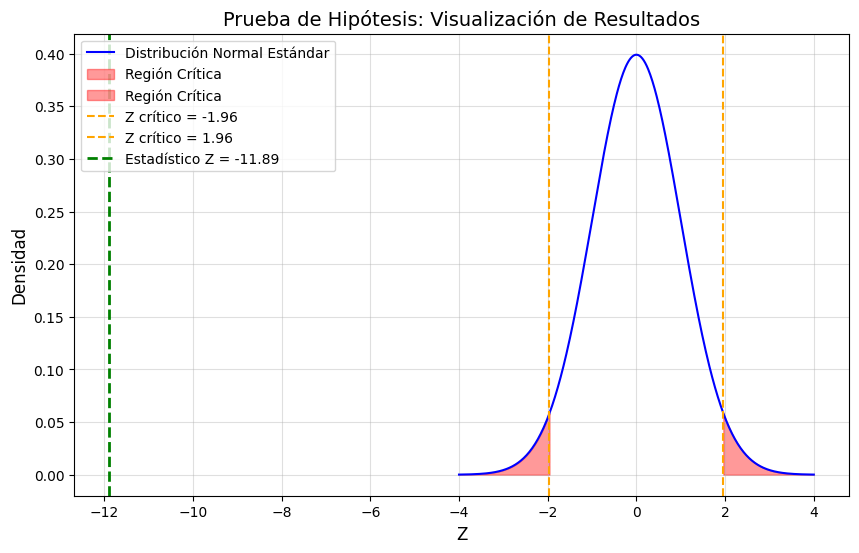

In [25]:
# Datos
touchscreen_counts = laptop_data['Touchscreen'].value_counts()
n = touchscreen_counts.sum()  # Tamaño de la muestra
successes = touchscreen_counts['Yes']  # Laptops con Touchscreen
p_hat = successes / n  # Proporción observada
p_0 = 0.30  # Proporción histórica

# Estadístico Z
z_stat = (p_hat - p_0) / np.sqrt((p_0 * (1 - p_0)) / n)

# Valor crítico y p-valor
z_critical = stats.norm.ppf(1 - 0.05 / 2)  # Dos colas
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Resultados
print(f"Tamaño de la muestra (n): {n}")
print(f"Proporción observada (p̂): {p_hat:.4f}")
print(f"Estadístico Z: {z_stat:.4f}")
print(f"Valor crítico Z: ±{z_critical:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisión
if abs(z_stat) > z_critical:
    print("Rechazamos la hipótesis nula (H0). La proporción ha cambiado significativamente.")
else:
    print("No rechazamos la hipótesis nula (H0). No hay evidencia suficiente para concluir que la proporción ha cambiado.")

# Aplicación para el caso de Touchscreen
plot_hypothesis_test(z_stat=z_stat, z_critical=z_critical, p_value=p_value, test_type='two-tailed')


#### Prueba de hipótesis 2

Queremos determinar si el porcentaje de laptops con IPSpanel es mayor al 40% en el conjunto de datos.

- **Hipótesis nula ($H_0$):** La proporción de laptops con IPSpanel es menor o igual al 40%.  
  $H_0: p \leq 0.40$

- **Hipótesis alternativa ($H_a$):** La proporción de laptops con IPSpanel es mayor al 40%. 
  $H_a: p > 0.40$

**Nivel de significancia ($\alpha$)**

- Fijamos un nivel de significancia de $\alpha = 0.05$ (5%).

**Cálculo del estadístico de prueba**

- Usamos la fórmula del estadístico $Z$ para proporciones:

$$
Z = \frac{\hat{p} - p_0}{\sqrt{p_0 (1 - p_0) / n}}
$$

donde:

- $\hat{p}$: Proporción observada.
- $p_0$: Proporción de la hipótesis nula ($p_0 = 0.40$).
- $n$: Tamaño de la muestra.

**Región crítica**

- Esta es una prueba de cola superior. Rechazaremos $H_0$ si:

$$
Z > Z_\alpha
$$


Tamaño de la muestra (n): 1275
Proporción observada (p̂): 0.2800
Estadístico Z: -8.7464
Valor crítico Z: 1.6449
Valor p: 1.0000
No rechazamos la hipótesis nula (H0). No hay evidencia suficiente para concluir que la proporción es mayor al 40%.


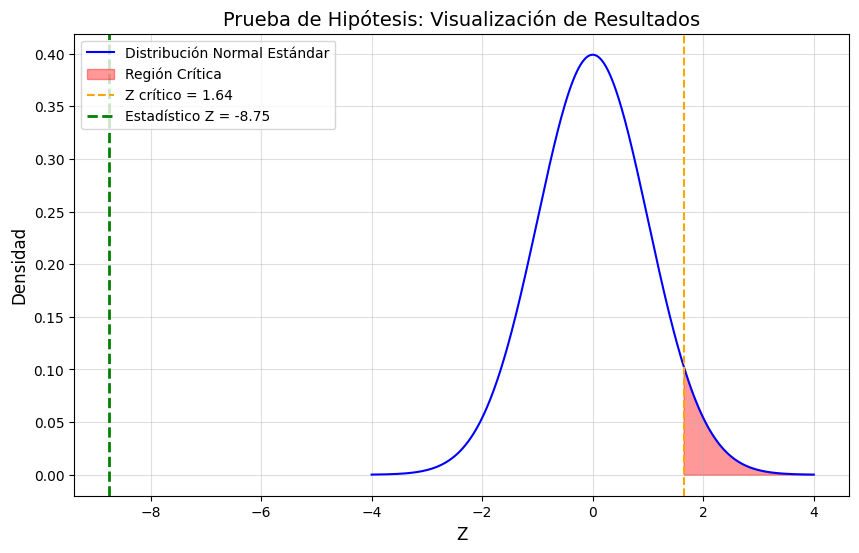

In [26]:
# Datos
ipspanel_counts = laptop_data['IPSpanel'].value_counts()
n = ipspanel_counts.sum()  # Tamaño de la muestra
successes = ipspanel_counts['Yes']  # Laptops con IPSpanel
p_hat = successes / n  # Proporción observada
p_0 = 0.40  # Proporción histórica

# Estadístico Z
z_stat = (p_hat - p_0) / np.sqrt((p_0 * (1 - p_0)) / n)

# Valor crítico y p-valor
z_critical = stats.norm.ppf(1 - 0.05)  # Cola superior
p_value = 1 - stats.norm.cdf(z_stat)

# Resultados
print(f"Tamaño de la muestra (n): {n}")
print(f"Proporción observada (p̂): {p_hat:.4f}")
print(f"Estadístico Z: {z_stat:.4f}")
print(f"Valor crítico Z: {z_critical:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisión
if z_stat > z_critical:
    print("Rechazamos la hipótesis nula (H0). La proporción de IPSpanel es significativamente mayor al 40%.")
else:
    print("No rechazamos la hipótesis nula (H0). No hay evidencia suficiente para concluir que la proporción es mayor al 40%.")

plot_hypothesis_test(z_stat=z_stat, z_critical=z_critical, p_value=p_value, test_type='right-tailed')

#### Prueba de hipótesis 3

Queremos determinar si el porcentaje de laptops con RetinaDisplay es significativamente diferente del 50%.

**Planteamiento de la hipótesis**

- **Hipótesis nula ($H_0$):** La proporción de laptops con RetinaDisplay es del 50%.  
  $H_0: p = 0.50$

- **Hipótesis alternativa ($H_a$):** La proporción de laptops con RetinaDisplay es diferente del 50%.  
  $H_a: p \neq 0.50$

**Nivel de significancia ($\alpha$)**

- Fijamos un nivel de significancia de $\alpha = 0.05$ (5%).

**Región crítica**

- Como esta es una prueba bilateral, rechazaremos $H_0$ si:

$$
|Z| > Z_{\alpha / 2}
$$


Tamaño de la muestra (n): 1275
Proporción observada (p̂): 0.0133
Estadístico Z: -34.7550
Valor crítico Z: ±1.9600
Valor p: 0.0000
Rechazamos la hipótesis nula (H0). La proporción de RetinaDisplay es significativamente diferente del 50%.


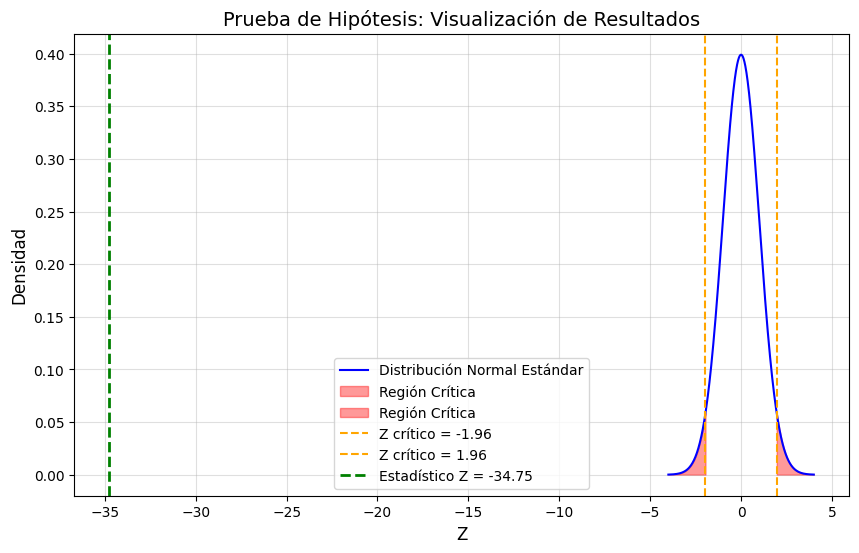

In [27]:
# Datos
retina_counts = laptop_data['RetinaDisplay'].value_counts()
n = retina_counts.sum()  # Tamaño de la muestra
successes = retina_counts['Yes']  # Laptops con RetinaDisplay
p_hat = successes / n  # Proporción observada
p_0 = 0.50  # Proporción histórica

# Estadístico Z
z_stat = (p_hat - p_0) / np.sqrt((p_0 * (1 - p_0)) / n)

# Valor crítico y p-valor
z_critical = stats.norm.ppf(1 - 0.05 / 2)  # Dos colas
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Resultados
print(f"Tamaño de la muestra (n): {n}")
print(f"Proporción observada (p̂): {p_hat:.4f}")
print(f"Estadístico Z: {z_stat:.4f}")
print(f"Valor crítico Z: ±{z_critical:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisión
if abs(z_stat) > z_critical:
    print("Rechazamos la hipótesis nula (H0). La proporción de RetinaDisplay es significativamente diferente del 50%.")
else:
    print("No rechazamos la hipótesis nula (H0). No hay evidencia suficiente para concluir que la proporción es diferente del 50%.")

plot_hypothesis_test(z_stat=z_stat, z_critical=z_critical, p_value=p_value, test_type='two-tailed')

#### Prueba de hipótesis 4

Queremos comparar si la proporción de laptops con Touchscreen ($p_1$) es significativamente diferente de la proporción de laptops con RetinaDisplay ($p_2$).

**Planteamiento de hipótesis**

- **Hipótesis nula ($H_0$):** No hay diferencia en las proporciones de las dos poblaciones.  
  $H_0: p_1 - p_2 = 0$

- **Hipótesis alternativa ($H_a$):** Existe una diferencia significativa entre las proporciones.  
  $H_a: p_1 - p_2 \neq 0$

**Nivel de significancia ($\alpha$)**

- Fijamos un nivel de significancia de $\alpha = 0.05$ (5%).

**Estadístico de prueba**

- El estadístico $Z$ para la diferencia de proporciones se calcula como:

$$
Z = \frac{(\hat{p}_1 - \hat{p}_2)}{\sqrt{\hat{p}(1 - \hat{p}) \left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$

donde:

- $\hat{p}_1$ y $\hat{p}_2$ son las proporciones observadas de las dos poblaciones.
- $\hat{p}$ es la proporción combinada, calculada como:

$$
\hat{p} = \frac{x_1 + x_2}{n_1 + n_2}
$$

- $n_1$ y $n_2$ son los tamaños de las dos poblaciones.

**Región crítica**

- Como esta es una prueba bilateral, rechazaremos $H_0$ si:

$$
|Z| > Z_{\alpha / 2}
$$


Tamaño de la muestra 1 (n1): 1275
Tamaño de la muestra 2 (n2): 1275
Proporción observada 1 (p̂1): 0.1475
Proporción observada 2 (p̂2): 0.0133
Estadístico Z: 12.4543
Valor crítico Z: ±1.9600
Valor p: 0.0000
Rechazamos la hipótesis nula (H0). Las proporciones son significativamente diferentes.


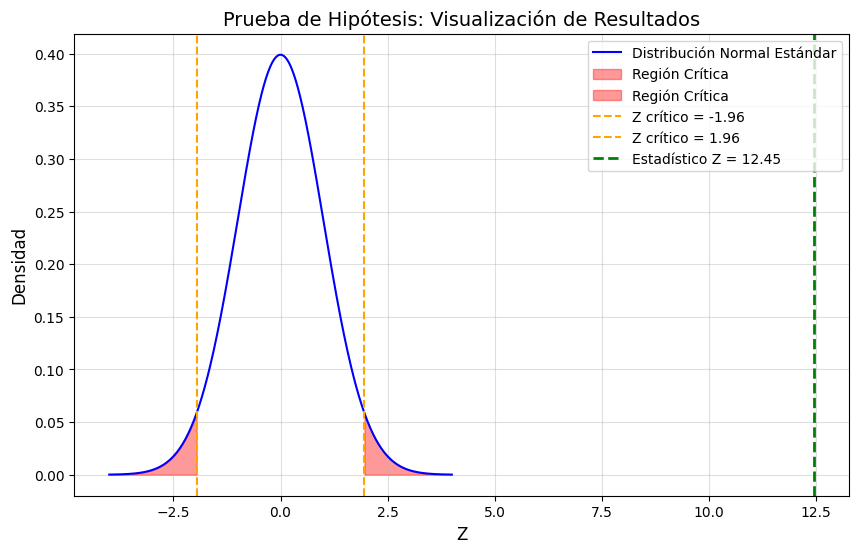

In [28]:
# Datos
touchscreen_counts = laptop_data['Touchscreen'].value_counts()
retina_counts = laptop_data['RetinaDisplay'].value_counts()

n1 = touchscreen_counts.sum()  # Tamaño de la muestra 1
x1 = touchscreen_counts['Yes']  # Laptops con Touchscreen

n2 = retina_counts.sum()  # Tamaño de la muestra 2
x2 = retina_counts['Yes']  # Laptops con RetinaDisplay

# Proporciones observadas
p1_hat = x1 / n1
p2_hat = x2 / n2

# Proporción combinada
p_combined = (x1 + x2) / (n1 + n2)

# Estadístico Z
z_stat = (p1_hat - p2_hat) / np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))

# Valor crítico y p-valor
z_critical = stats.norm.ppf(1 - 0.05 / 2)  # Dos colas
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Resultados
print(f"Tamaño de la muestra 1 (n1): {n1}")
print(f"Tamaño de la muestra 2 (n2): {n2}")
print(f"Proporción observada 1 (p̂1): {p1_hat:.4f}")
print(f"Proporción observada 2 (p̂2): {p2_hat:.4f}")
print(f"Estadístico Z: {z_stat:.4f}")
print(f"Valor crítico Z: ±{z_critical:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisión
if abs(z_stat) > z_critical:
    print("Rechazamos la hipótesis nula (H0). Las proporciones son significativamente diferentes.")
else:
    print("No rechazamos la hipótesis nula (H0). No hay evidencia suficiente para concluir que las proporciones son diferentes.")

plot_hypothesis_test(z_stat=z_stat, z_critical=z_critical, p_value=p_value, test_type='two-tailed')

#### Prueba de hipótesis 5


**Planteamiento del problema**

Queremos determinar si el peso promedio de las laptops con Touchscreen ($\mu_1$) es mayor que el de las laptops sin Touchscreen ($\mu_2$).

**Planteamiento de hipótesis**

- **Hipótesis nula ($H_0$):** El peso promedio de las laptops con Touchscreen es menor o igual al de las laptops sin Touchscreen.  
  $H_0: \mu_1 - \mu_2 \leq 0$

- **Hipótesis alternativa ($H_a$):** El peso promedio de las laptops con Touchscreen es mayor.  
  $H_a: \mu_1 - \mu_2 > 0$

**Nivel de significancia ($\alpha$)**

- Fijamos un nivel de significancia de $\alpha = 0.05$ (5%).

**Estadístico de prueba**

- El estadístico $t$ para la diferencia de medias se calcula como:

$$
t = \frac{(\bar{x}_1 - \bar{x}_2)}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

donde:

- $\bar{x}_1$ y $\bar{x}_2$: Medias muestrales de las dos poblaciones.
- $s_1^2$ y $s_2^2$: Varianzas muestrales de las dos poblaciones.
- $n_1$ y $n_2$: Tamaños de las dos poblaciones.


Tamaño de la muestra 1 (n1): 188
Tamaño de la muestra 2 (n2): 1087
Media muestral 1 (x̄1): 1.5677
Media muestral 2 (x̄2): 2.1223
Estadístico t: -12.9100
Valor crítico t: 1.6530
Valor p: 1.0000
No rechazamos la hipótesis nula (H0). No hay evidencia suficiente para concluir que el peso promedio es mayor.


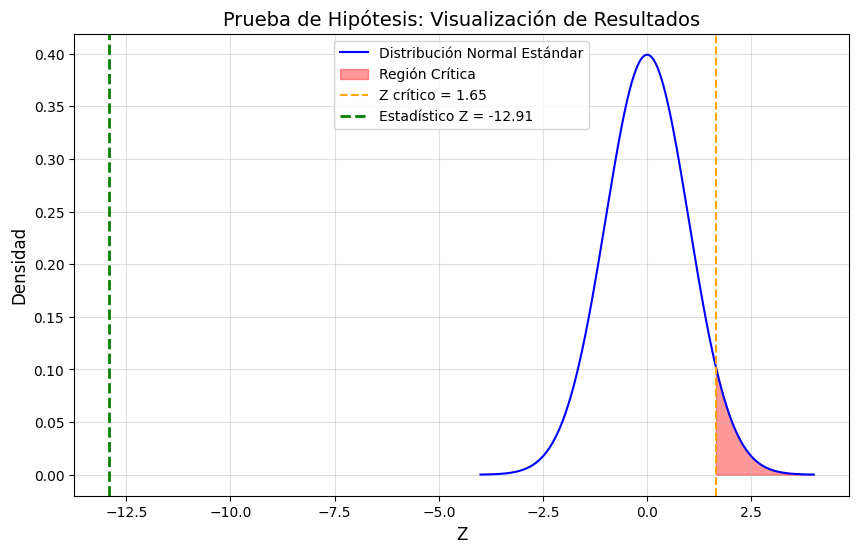

In [29]:
# Datos
touchscreen_weights = laptop_data[laptop_data['Touchscreen'] == 'Yes']['Weight']
non_touchscreen_weights = laptop_data[laptop_data['Touchscreen'] == 'No']['Weight']

n1 = len(touchscreen_weights)
n2 = len(non_touchscreen_weights)

mean1 = touchscreen_weights.mean()
mean2 = non_touchscreen_weights.mean()

std1 = touchscreen_weights.std()
std2 = non_touchscreen_weights.std()

# Estadístico t
t_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Valor crítico y p-valor
df = min(n1 - 1, n2 - 1)  # Grados de libertad aproximados
t_critical = stats.t.ppf(1 - 0.05, df)
p_value = 1 - stats.t.cdf(t_stat, df)

# Resultados
print(f"Tamaño de la muestra 1 (n1): {n1}")
print(f"Tamaño de la muestra 2 (n2): {n2}")
print(f"Media muestral 1 (x̄1): {mean1:.4f}")
print(f"Media muestral 2 (x̄2): {mean2:.4f}")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor crítico t: {t_critical:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisión
if t_stat > t_critical:
    print("Rechazamos la hipótesis nula (H0). El peso promedio de laptops con Touchscreen es significativamente mayor.")
else:
    print("No rechazamos la hipótesis nula (H0). No hay evidencia suficiente para concluir que el peso promedio es mayor.")

plot_hypothesis_test(z_stat=t_stat, z_critical=t_critical, p_value=p_value, test_type='right-tailed')

#### Prueba de hipótesis 6

Queremos determinar si las varianzas del peso de las laptops con Touchscreen ($\sigma_1^2$) y las sin Touchscreen ($\sigma_2^2$) son significativamente diferentes.

**Planteamiento de hipótesis**

- **Hipótesis nula ($H_0$):** Las varianzas son iguales.  
  $H_0: \sigma_1^2 = \sigma_2^2$

- **Hipótesis alternativa ($H_a$):** Las varianzas son diferentes.  
  $H_a: \sigma_1^2 \neq \sigma_2^2$

**Nivel de significancia ($\alpha$)**

- Fijamos un nivel de significancia de $\alpha = 0.05$ (5%).

**Estadístico de prueba**

- Utilizamos la **prueba F** para comparar varianzas. El estadístico de prueba se calcula como:

$$
F = \frac{s_1^2}{s_2^2}
$$

donde:

- $s_1^2$ y $s_2^2$: Varianzas muestrales de las dos poblaciones.  
- Se asume que $s_1^2 \geq s_2^2$ para calcular el estadístico correctamente.

**Región crítica**

- La región crítica se define con los valores críticos $F_{1-\alpha/2}$ y $F_{\alpha/2}$, obtenidos de la **distribución F** con grados de libertad:

- $df_1 = n_1 - 1$  
- $df_2 = n_2 - 1$

Rechazamos $H_0$ si:

$$
F > F_{1-\alpha/2} \quad \text{o} \quad F < F_{\alpha/2}
$$


Tamaño de la muestra 1 (n1): 188
Tamaño de la muestra 2 (n2): 1087
Varianza muestral 1 (s1^2): 0.2721
Varianza muestral 2 (s2^2): 0.4331
Estadístico F: 1.5916
Valores críticos F: [0.7956, 1.2353]
Valor p: 2.0000
Rechazamos la hipótesis nula (H0). Las varianzas son significativamente diferentes.


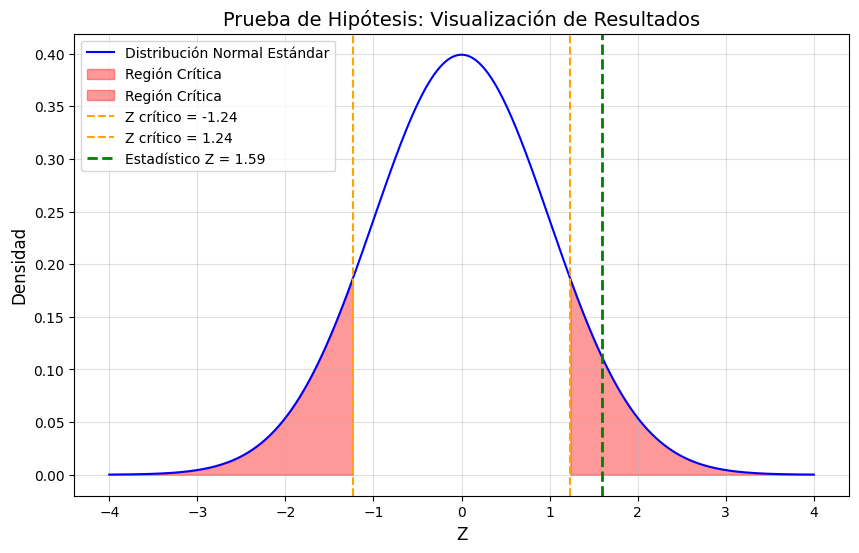

In [30]:
from scipy.stats import f

# Datos
touchscreen_weights = laptop_data[laptop_data['Touchscreen'] == 'Yes']['Weight']
non_touchscreen_weights = laptop_data[laptop_data['Touchscreen'] == 'No']['Weight']

n1 = len(touchscreen_weights)
n2 = len(non_touchscreen_weights)

var1 = touchscreen_weights.var(ddof=1)  # Varianza muestral 1
var2 = non_touchscreen_weights.var(ddof=1)  # Varianza muestral 2

# Estadístico F
F_stat = var1 / var2 if var1 >= var2 else var2 / var1

# Grados de libertad
df1 = n1 - 1
df2 = n2 - 1

# Valores críticos
alpha = 0.05
F_critical_upper = f.ppf(1 - alpha / 2, df1, df2)
F_critical_lower = f.ppf(alpha / 2, df1, df2)

# p-valor
if var1 >= var2:
    p_value = 2 * (1 - f.cdf(F_stat, df1, df2))
else:
    p_value = 2 * f.cdf(F_stat, df1, df2)

# Resultados
print(f"Tamaño de la muestra 1 (n1): {n1}")
print(f"Tamaño de la muestra 2 (n2): {n2}")
print(f"Varianza muestral 1 (s1^2): {var1:.4f}")
print(f"Varianza muestral 2 (s2^2): {var2:.4f}")
print(f"Estadístico F: {F_stat:.4f}")
print(f"Valores críticos F: [{F_critical_lower:.4f}, {F_critical_upper:.4f}]")
print(f"Valor p: {p_value:.4f}")

# Decisión
if F_stat > F_critical_upper or F_stat < F_critical_lower:
    print("Rechazamos la hipótesis nula (H0). Las varianzas son significativamente diferentes.")
else:
    print("No rechazamos la hipótesis nula (H0). No hay evidencia suficiente para concluir que las varianzas son diferentes.")

plot_hypothesis_test(z_stat=F_stat, z_critical=F_critical_upper, p_value=p_value, test_type='two-tailed')

In [31]:
# Crear una tabla de contingencia entre 'Company' y 'TypeName'
contingency_table = pd.crosstab(laptop_data['Company'], laptop_data['TypeName'])

# Mostrar la tabla de contingencia
contingency_table

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
Company,,,,,,
Acer,8,8,5,76,4,0
Apple,0,0,0,0,21,0
Asus,13,54,4,63,18,0
Chuwi,0,0,0,3,0,0
Dell,30,40,2,159,49,11
Fujitsu,0,0,0,3,0,0
Google,0,0,0,0,3,0
HP,19,12,7,180,36,14
Huawei,0,0,0,0,2,0


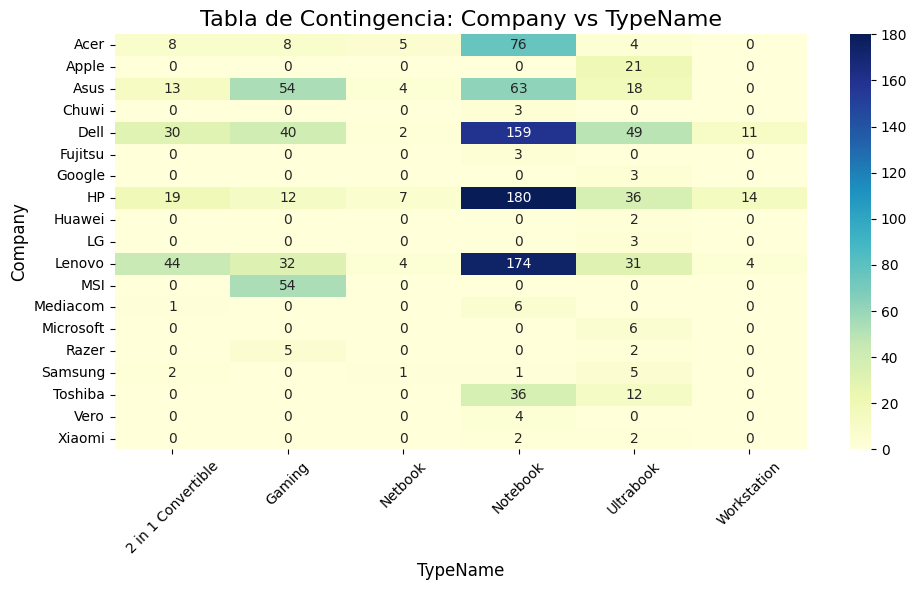

In [32]:
# Crear un mapa de calor para la tabla de contingencia
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Personalizar el gráfico
plt.title("Tabla de Contingencia: Company vs TypeName", fontsize=16)
plt.xlabel("TypeName", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### 3.3 Análisis de la tabla de contingencia: `Company` vs `TypeName`

1. **Dominancia de Notebook:**
   - La categoría `Notebook` es la más representada en la mayoría de los fabricantes, especialmente en empresas como:
     - **HP**: 180 productos.
     - **Lenovo**: 174 productos.
     - **Dell**: 159 productos.
     - **Acer**: 76 productos.
   - Esto refleja que los fabricantes se enfocan principalmente en esta línea de productos, probablemente debido a su alta demanda.

2. **Especialización en Gaming:**
   - **MSI** es claramente un fabricante especializado en laptops gaming, con 54 productos en esta categoría y ninguna representación en otras líneas.
   - **Asus** y **Dell** también tienen una fuerte presencia en esta categoría con 54 y 40 productos, respectivamente.

3. **Ultrabooks:**
   - **Apple** lidera en la categoría de `Ultrabook` con 21 productos. Esto coincide con la estrategia de Apple de centrarse en laptops premium como los MacBook.
   - **Dell** y **HP** también tienen una presencia considerable con 49 y 36 productos, respectivamente.

4. **2-in-1 Convertible:**
   - **Lenovo** destaca con 44 productos en esta categoría, seguido por **Dell** con 30 y **HP** con 19.
   - Este segmento parece estar dominado por fabricantes que buscan innovar con laptops versátiles.

5. **Netbooks:**
   - Esta categoría tiene una representación muy baja en general, con solo algunos productos de marcas como **Acer** (5), **Asus** (4), y **HP** (7). Esto sugiere que el mercado de netbooks está en declive.

6. **Workstations:**
   - Las `Workstations` tienen una representación limitada, siendo **HP** y **Dell** los principales fabricantes en este segmento con 14 y 11 productos, respectivamente.
   - Esto refleja que las estaciones de trabajo son una categoría de nicho enfocada en usuarios profesionales.

#### Conclusiones:
1. **Líderes por categoría:**
   - **Notebook**: HP, Lenovo, Dell.
   - **Gaming**: MSI, Asus.
   - **Ultrabook**: Apple, Dell.
   - **2-in-1 Convertible**: Lenovo, Dell.

2. **Diversificación:**
   - **HP**, **Dell**, y **Lenovo** tienen una amplia diversificación en todas las categorías, lo que podría indicar una estrategia de mercado equilibrada para atender a diferentes segmentos.

3. **Enfoque en productos premium:**
   - Marcas como **Apple**, **Microsoft**, y **Razer** tienen una oferta limitada, centrada en categorías premium como `Ultrabook` y `Gaming`.

4. **Mercado de nicho:**
   - Las categorías como `Netbook` y `Workstation` tienen poca representación, lo que podría indicar menor demanda o un enfoque en mercados especializados.


#### Test de Homogeneidad e Independencia para la Tabla de Contingencia

**1. Test de Homogeneidad**: 
El test de homogeneidad evalúa si las distribuciones de las categorías (en este caso, los tipos de laptops) son similares entre diferentes fabricantes.

Hipótesis:
- **H₀ (Hipótesis nula):** La distribución de los tipos de laptops es la misma entre los fabricantes.
- **H₁ (Hipótesis alternativa):** La distribución de los tipos de laptops difiere entre los fabricantes.

**2. Test de Independencia**: 
El test de independencia evalúa si hay una relación entre las dos variables categóricas (`Company` y `TypeName`) o si son independientes.

Hipótesis:
- **H₀ (Hipótesis nula):** Las variables `Company` y `TypeName` son independientes.
- **H₁ (Hipótesis alternativa):** Las variables `Company` y `TypeName` están relacionadas.


In [33]:
# Test de Chi-Cuadrado
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi2 Statistic: 698.3420972667907
p-value: 7.661508096764154e-95
Degrees of Freedom: 90


#### Análisis de los resultados de los test de homogeneidad e independencia

Este test verifica si la distribución de los tipos de laptops es homogénea entre los fabricantes.

**1. Test de Homogeneidad:**
- **p-value muy bajo** (
7.66 × 10⁻⁹⁵
):
  - Con un nivel de significancia común (
𝛼 = 0.05
), rechazamos la hipótesis nula (
H₀
).
  - Esto implica que las distribuciones de los tipos de laptops difieren significativamente entre los fabricantes.


**2. Test de Independencia:**
- **p-value muy bajo** (
7.66 × 10⁻⁹⁵
):
  - Rechazamos la hipótesis nula (
H₀
) de independencia.
  - Esto sugiere que existe una relación significativa entre el fabricante (`Company`) y el tipo de laptop (`TypeName`).

**Conclusiones:**
1. **Distribuciones no homogéneas:**
   - Las distribuciones de los tipos de laptops no son homogéneas entre los fabricantes. Esto indica que ciertos fabricantes tienden a especializarse en determinados tipos de laptops. Por ejemplo:
     - **Apple** produce únicamente `Ultrabooks`.
     - **MSI** se enfoca en laptops `Gaming`.
     - **Lenovo**, **Dell**, y **HP** tienen una gama más diversificada de tipos.

2. **Relación significativa:**
   - Existe una relación significativa entre el fabricante y el tipo de laptop. 
   - Esto refleja que las empresas tienen estrategias de mercado y especializaciones claras en términos de los productos que ofrecen.


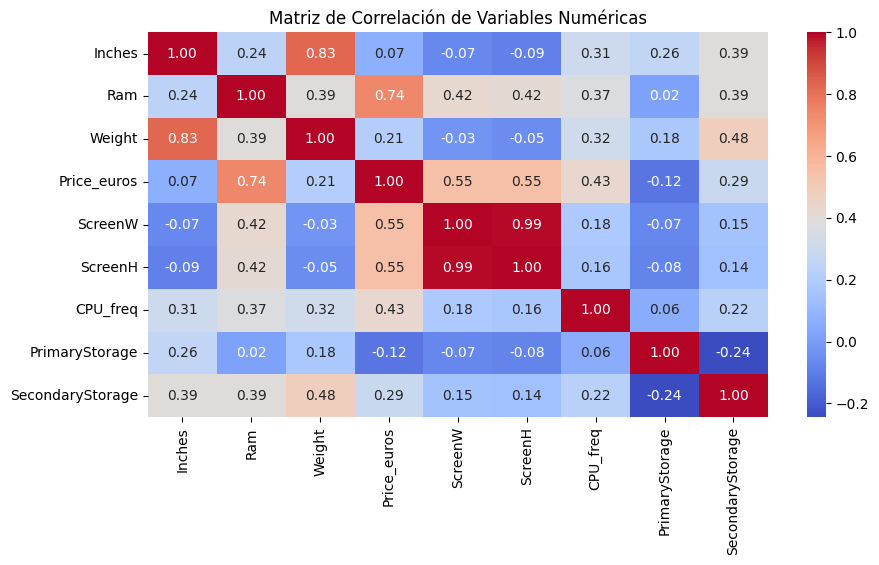

In [34]:
# Seleccionar solo columnas numéricas
numerical_columns = laptop_data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_columns.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

#### Análisis de la Matriz de Correlación

A partir de la matriz de correlación presentada en el mapa de calor, se pueden extraer las siguientes conclusiones sobre la correlación lineal entre las variables numéricas:

##### 1. Correlaciones fuertes:
- **ScreenW y ScreenH (r ≈ 0.99):** 
  - Existe una correlación positiva extremadamente fuerte entre el ancho (`ScreenW`) y el alto (`ScreenH`) de la pantalla. Esto es intuitivo, ya que ambas dimensiones están relacionadas por la proporción de la pantalla.
- **Inches y Weight (r ≈ 0.83):** 
  - Existe una correlación positiva fuerte entre el tamaño de la pantalla (`Inches`) y el peso (`Weight`). Es lógico suponer que laptops con pantallas más grandes suelen ser más pesadas debido a componentes más grandes.

##### 2. Correlaciones moderadas:
- **Price_euros y Ram (r ≈ 0.74):**
  - Hay una correlación positiva moderada-alta entre el precio y la cantidad de RAM. Esto indica que laptops con mayor RAM suelen ser más costosas.
- **Price_euros y ScreenW/ScreenH (r ≈ 0.55):**
  - Existe una correlación positiva moderada entre el precio y las dimensiones de la pantalla. Esto sugiere que laptops con pantallas más grandes pueden ser más caras.
- **Price_euros y CPU_freq (r ≈ 0.43):**
  - Hay una correlación positiva moderada entre el precio y la frecuencia del procesador, lo que indica que laptops con procesadores más rápidos tienden a ser más caras.

##### 3. Correlaciones bajas o insignificantes:
- **Price_euros y Inches (r ≈ 0.07):**
  - Existe una correlación muy baja entre el tamaño de la pantalla en pulgadas y el precio, lo cual indica que el tamaño por sí solo no es un factor determinante del costo.
- **PrimaryStorage y Price_euros (r ≈ -0.12):**
  - La correlación entre el almacenamiento primario y el precio es baja y negativa, sugiriendo que el almacenamiento no es un fuerte determinante del precio en este conjunto de datos.

##### 4. Relaciones específicas de interés:
- **SecondaryStorage y Weight (r ≈ 0.48):**
  - Existe una correlación positiva moderada entre el almacenamiento secundario y el peso, lo que podría indicar que laptops con más almacenamiento secundario suelen ser más pesadas.
- **Ram y ScreenW/ScreenH (r ≈ 0.42):**
  - Hay una correlación moderada entre la cantidad de RAM y las dimensiones de la pantalla. Esto sugiere que laptops con pantallas más grandes tienden a tener mayor capacidad de RAM.

#### Interpretaciones Generales:
**Precio (`Price_euros`) como variable clave:**
- El precio tiene una correlación más fuerte con características de rendimiento como `Ram` y `CPU_freq`, mientras que tiene correlaciones más débiles con características físicas como `Inches` o `Weight`.
- El precio también está moderadamente relacionado con las dimensiones de la pantalla, lo que indica que las pantallas más grandes suelen estar asociadas a laptops de gama alta.

**Características físicas:**
- El peso está fuertemente correlacionado con el tamaño de la pantalla, lo que es lógico porque laptops más grandes suelen ser más pesadas.
- Las dimensiones de la pantalla están altamente correlacionadas entre sí.

**Rendimiento:**
- La `Ram` y la frecuencia del `CPU` tienen correlaciones moderadas con el precio, destacando su importancia en el costo final de una laptop.


### 3.4 Analisis de la linealidad de las variables

Basándonos en las conclusiones del análisis de la matriz de correlación, las variables más prometedoras e interesantes para analizar en el pair plot son aquellas que presentan correlaciones fuertes o moderadas y tienen una relación significativa con el precio o las características físicas y de rendimiento. Estas variables son:

1. `Price_euros`: Variable clave para evaluar cómo las diferentes características afectan el precio.
2. `Ram`: Tiene una correlación moderada-alta con el precio.
3. `CPU_freq`: Relacionada moderadamente con el precio.
4. `Weight`: Fuerte relación con características físicas como el tamaño de la pantalla.
5. `Inches`: Aunque su correlación con el precio es baja, tiene una fuerte correlación con el peso.

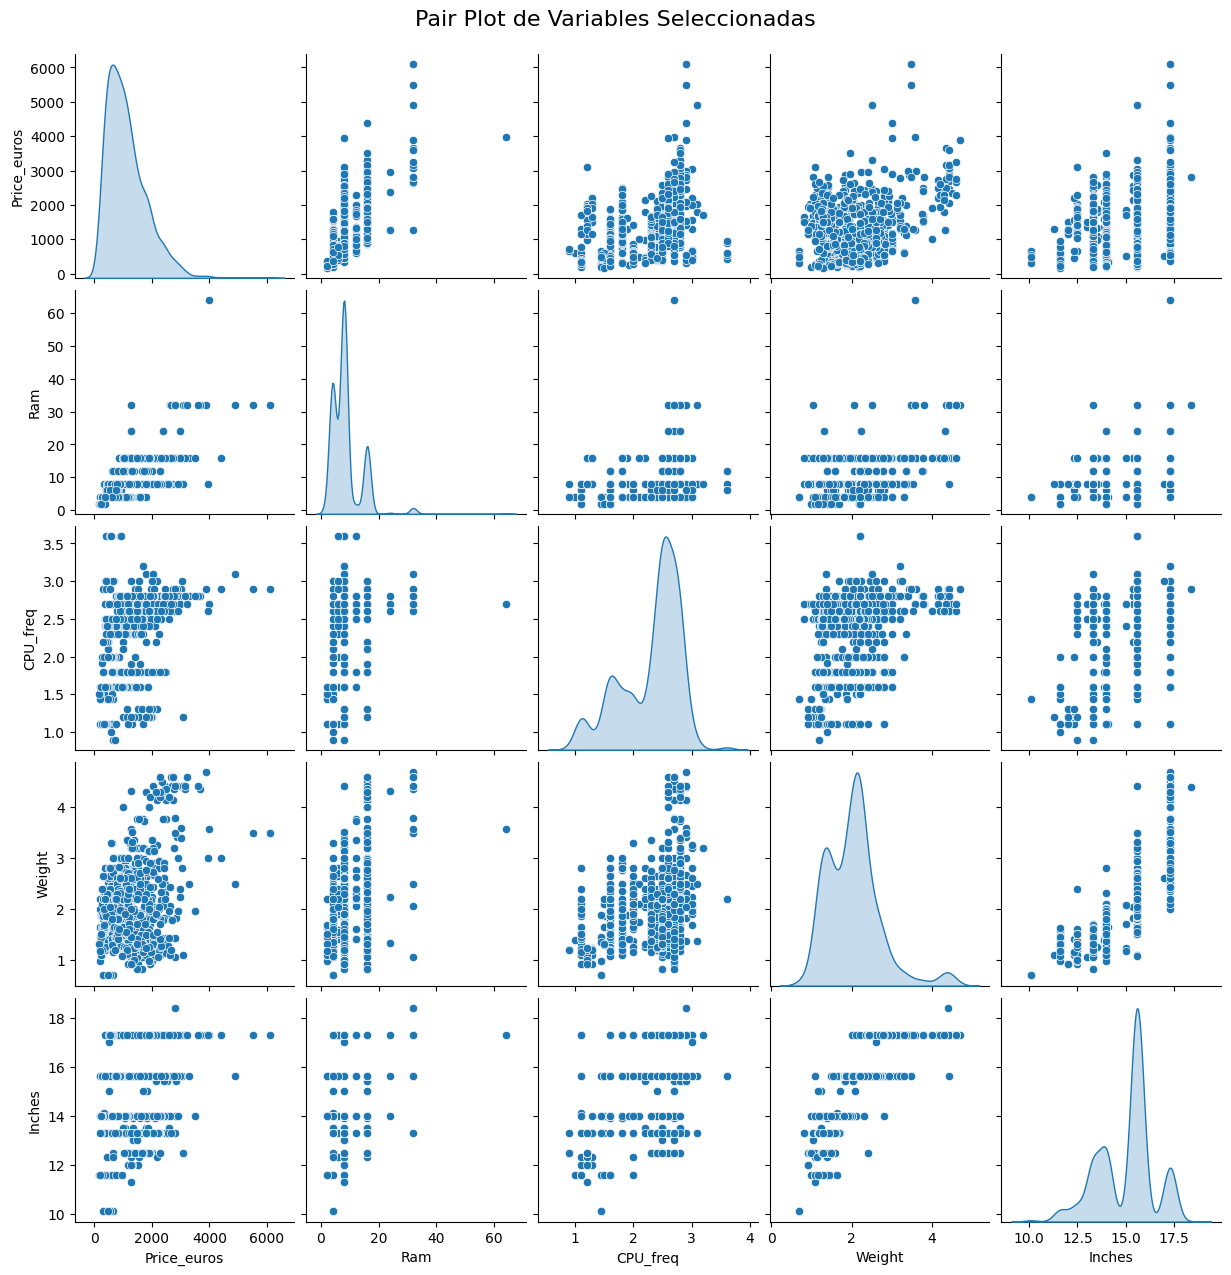

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables más interesantes
selected_columns = ['Price_euros', 'Ram', 'CPU_freq', 'Weight', 'Inches']

# Crear el pair plot sin el argumento `palette`
pair_plot = sns.pairplot(
    laptop_data[selected_columns], 
    diag_kind="kde", 
    corner=False
)
pair_plot.figure.suptitle("Pair Plot de Variables Seleccionadas", y=1.02, fontsize=16)
plt.show()


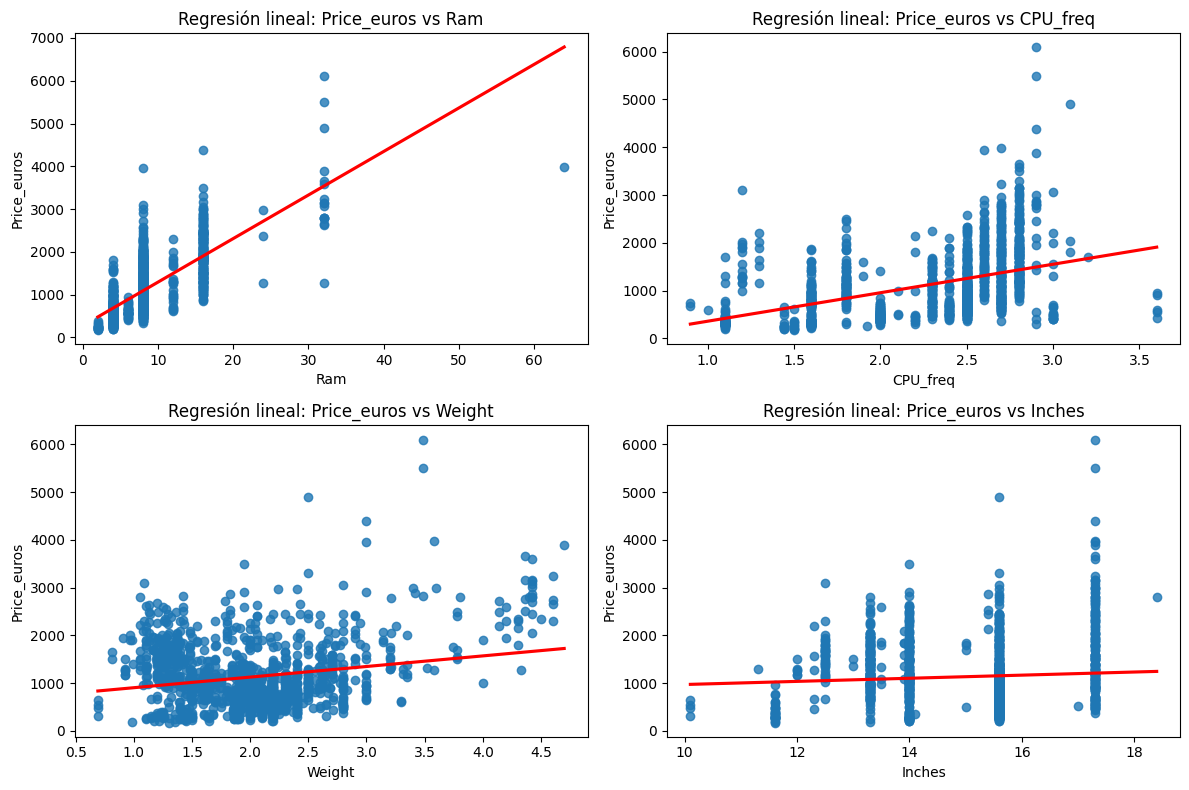

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las variables
variables = ['Ram', 'CPU_freq', 'Weight', 'Inches']

# Crear subplots: Número de filas y columnas según la cantidad de variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Recorrer las variables y asignar cada una a un subplot
for i, var in enumerate(variables):
    row = i // 2  # Fila del subplot
    col = i % 2   # Columna del subplot
    
    sns.regplot(
        data=laptop_data, x=var, y='Price_euros', 
        ci=None, line_kws={'color': 'red'}, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Regresión lineal: Price_euros vs {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Price_euros')

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()


A partir de los gráficos de regresión, se pueden sacar las siguientes conclusiones preliminares sobre la relación entre las variables independientes y el precio (`Price_euros`):

1. **RAM (`Ram`)**:
   - Existe una **fuerte relación positiva** entre la cantidad de RAM y el precio. A medida que aumenta la RAM, el precio también tiende a incrementarse significativamente.
   - Esto indica que la RAM es un factor importante que influye en el costo de los laptops.

2. **Frecuencia del CPU (`CPU_freq`)**:
   - La relación es **positiva pero débil**, lo que sugiere que una mayor frecuencia de CPU tiende a asociarse con precios más altos, aunque no de manera tan pronunciada como la RAM.
   - Esto podría deberse a que otros factores del CPU (como el número de núcleos o la arquitectura) tienen más peso en el precio que la frecuencia por sí sola.

3. **Peso (`Weight`)**:
   - Existe una **relación positiva muy débil** entre el peso del laptop y su precio.
   - Esto podría deberse a que el peso no es un factor determinante para el costo, o que los laptops más pesados pertenecen a gamas más económicas o intermedias.

4. **Tamaño de la pantalla (`Inches`)**:
   - La relación es **muy débil y prácticamente nula**. El tamaño de la pantalla no parece influir significativamente en el precio de los laptops.
   - Esto podría indicar que los laptops con pantallas más grandes no necesariamente son más caros, ya que el precio puede depender más de otros factores internos (hardware).


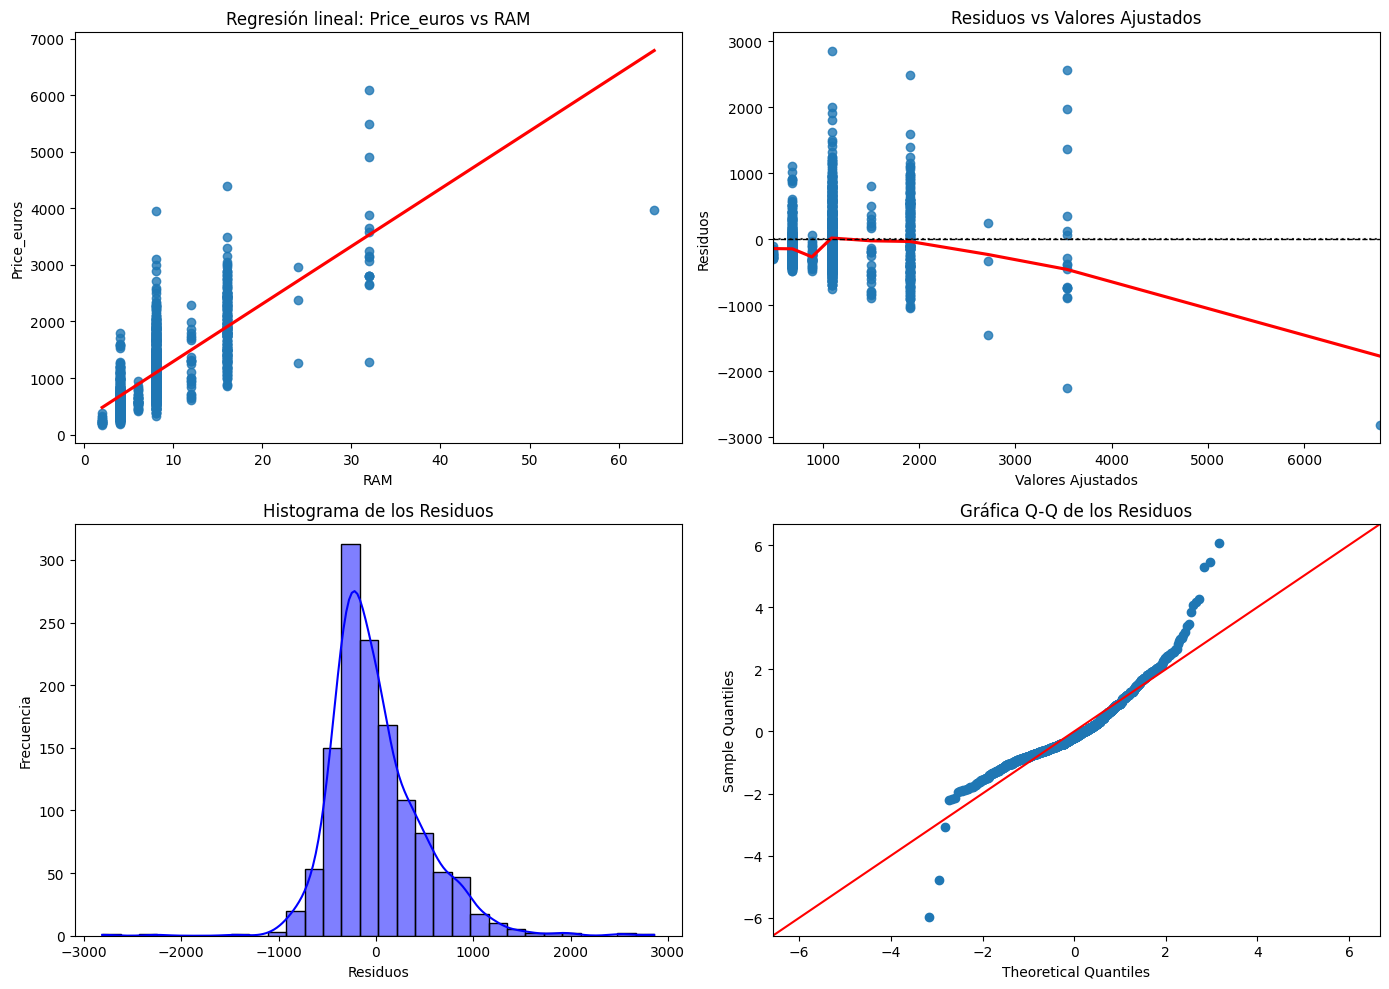

In [37]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo de regresión lineal
x = laptop_data[['Ram']]
X = sm.add_constant(x)
y = laptop_data['Price_euros']
modelo = sm.OLS(y, X).fit()

# Valores ajustados y residuos
fitted_values = modelo.fittedvalues
residuals = modelo.resid

# Crear subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#
sns.regplot(data=laptop_data, x=x, y=y, ci=None, line_kws={'color': 'red'}, ax=axes[0, 0])
axes[0, 0].set_title(f'Regresión lineal: Price_euros vs RAM')
axes[0, 0].set_xlabel('RAM')
axes[0, 0].set_ylabel('Price_euros')

# 1. Residuos vs Valores Ajustados (Linealidad y Homocedasticidad)
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red'}, ax=axes[0, 1])
axes[0, 1].axhline(0, color='black', linestyle='--', linewidth=1)
axes[0, 1].set_title('Residuos vs Valores Ajustados')
axes[0, 1].set_xlabel('Valores Ajustados')
axes[0, 1].set_ylabel('Residuos')

# 2. Histograma de los Residuos (Normalidad)
sns.histplot(residuals, kde=True, bins=30, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Histograma de los Residuos')
axes[1, 0].set_xlabel('Residuos')
axes[1, 0].set_ylabel('Frecuencia')

# 3. Gráfica Q-Q (Normalidad)
sm.qqplot(residuals, line='45', fit=True, ax=axes[1, 1])
axes[1, 1].set_title('Gráfica Q-Q de los Residuos')


# Ajustar diseño
plt.tight_layout()
plt.show()

Analizando las gráficas generadas, podemos sacar las siguientes conclusiones sobre las suposiciones del modelo de regresión lineal:

1. **Residuos vs Valores Ajustados**
  - Parece haber un patrón curvo en los residuos, lo que indica que la relación entre `Price_euros` y `Ram` podría no ser estrictamente lineal.
  - La dispersión de los puntos no es uniforme (se estrecha hacia valores altos de `Price_euros`), lo que sugiere **heterocedasticidad** (varianza no constante en los residuos), es decir, la suposición de linealidad y homocedasticidad no se cumple completamente.

2. **Histograma de los Residuos**
  - El histograma tiene una forma aproximadamente simétrica, pero con ligeros indicios de colas más pesadas (outliers).
  - Aunque hay desviaciones, la normalidad de los residuos parece ser aceptable para este modelo.

3. **Gráfica Q-Q**
  - Los puntos siguen la línea roja en la mayoría del rango, pero se desvían significativamente en las colas (valores extremos), es decir, la normalidad no es perfecta.
  - Esto confirma la presencia de **outliers** o una distribución con colas más pesadas.


**Analisis de los supuestos**

1. Para comprobar que los errores son independientes se utiliza un test de independencia sobre los residuos, el test Durbin-Watson

    - $H_0$: No existe correlación entre los residuos.

    - $H_1$: Los residuos están autocorrelacionados.

2. Para comprobar la Varianza del error aleatorio es constante se realiza un test de Breusch-Pagan para determinar la Homocedasticidad de los residuos. 

    - $H_0$: La homocedasticidad está presente.

    - $H_1$: La homocedasticidad no está presente (es decir, existe heterocedasticidad)

In [38]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan


# Independence (Durbin-Watson Test)
dw_test = durbin_watson(residuals)

print(f'Durbin-Watson Test: {dw_test}')

alpha = 0.5

if 2 - alpha <= dw_test <= 2 + alpha:
    print("Los residuos son independientes.")
elif dw_test > 2 + 0.5:
    print("Existe una autocorrelacion positiva.")
else:
    print("Existe una autocorrelacion negativa")
    
    
# Homoscedasticity (Breusch-Pagan test)
_, bp_pvalue, _, _ = het_breuschpagan(residuals, X)

print(f'Breusch-Pagan Test p-value: {bp_pvalue}')

if bp_pvalue < 0.05:
    print("Se rechaza la hipotesis nula y port tanto la homocedasticidad no esta presente.")
else:
    print("No hay sufienciente evidencia para rechazar la hipotesis nula y por tanto la homocedasticidad esta presente.")

Durbin-Watson Test: 2.026560223329475
Los residuos son independientes.
Breusch-Pagan Test p-value: 2.5515263271325886e-38
Se rechaza la hipotesis nula y port tanto la homocedasticidad no esta presente.


In [39]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Variables seleccionadas para el análisis
variables = ['Ram', 'CPU_freq', 'Weight', 'Inches']
X = laptop_data[variables]
y = laptop_data['Price_euros']

# Añadir constante para el modelo
X = sm.add_constant(X)

# Modelo de regresión múltiple
modelo = sm.OLS(y, X).fit()

# Calcular VIF (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Resumen del modelo
resumen_modelo = modelo.summary()
vif_data, resumen_modelo


(   Variable         VIF
 0     const  223.500548
 1       Ram    1.322381
 2  CPU_freq    1.225814
 3    Weight    3.594022
 4    Inches    3.290234,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            Price_euros   R-squared:                       0.603
 Model:                            OLS   Adj. R-squared:                  0.602
 Method:                 Least Squares   F-statistic:                     481.9
 Date:                Sun, 26 Jan 2025   Prob (F-statistic):          8.39e-253
 Time:                        15:52:28   Log-Likelihood:                -9574.0
 No. Observations:                1275   AIC:                         1.916e+04
 Df Residuals:                    1270   BIC:                         1.918e+04
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         

A partir de los resultados del análisis de regresión múltiple, podemos extraer varias conclusiones importantes. 

**1. Análisis del modelo general:**
- `R-cuadrado (R²):`
  El modelo tiene un R² de 0.603, lo que significa que el 60.3% de la variabilidad en el precio de las laptops (`Price_euros`) se puede explicar mediante las variables predictoras (`Ram`, `CPU_freq`, `Weight` y `Inches`). Aunque no es un ajuste perfecto, es un valor moderado que indica que el modelo tiene un nivel de explicabilidad razonable.
  
- `Valor p del F-statistic:`
  El valor p es prácticamente cero (8.39e-253), lo que indica que el modelo como un todo es estadísticamente significativo y las variables independientes tienen un impacto conjunto en el precio.


**2. Interpretación de coeficientes:**
Cada coeficiente indica cuánto cambia el precio de la laptop (`Price_euros`) por una unidad adicional de la variable correspondiente, manteniendo las otras variables constantes:
- `Ram (95.21):`
  Por cada GB adicional de memoria RAM, el precio promedio de una laptop aumenta aproximadamente en **95.21 euros**, manteniendo las demás variables constantes. Este coeficiente es altamente significativo (\(p < 0.001\)).
  
- `CPU_freq (312.28):`
  Un aumento de 1 GHz en la frecuencia del CPU incrementa el precio promedio en **312.28 euros**, lo que demuestra una relación fuerte y significativa (\(p < 0.001\)).
  
- `Weight (33.85):`
  El peso tiene un coeficiente positivo, pero no es estadísticamente significativo (\(p = 0.335\)). Esto sugiere que el peso de las laptops podría no ser un factor importante en el precio.
  
- `Inches (-95.88):`
  Un aumento de 1 pulgada en el tamaño de la pantalla está asociado con una disminución promedio de **95.88 euros** en el precio, lo cual es sorprendente. Es estadísticamente significativo (\(p < 0.001\)), pero merece una interpretación más cuidadosa. Podría ser que las laptops más grandes correspondan a modelos menos costosos o antiguos.

**3. Análisis de multicolinealidad (VIF):**
Los factores de inflación de la varianza (VIF) son indicadores de multicolinealidad entre las variables predictoras:
- Todos los valores de VIF están por debajo de 10, lo que indica que no hay problemas graves de multicolinealidad.
- La variable con mayor VIF es el peso (`Weight`, 3.59), pero este valor sigue siendo aceptable.


**4. Diagnóstico de los residuos:**
- `Omnibus y Jarque-Bera (JB):`
  Los residuos no siguen una distribución normal (\(p = 0.000\)), lo que podría afectar la validez de las inferencias realizadas con este modelo.
- `Durbin-Watson:`
  El valor de 2.073 indica que no hay problemas significativos de autocorrelación en los residuos.


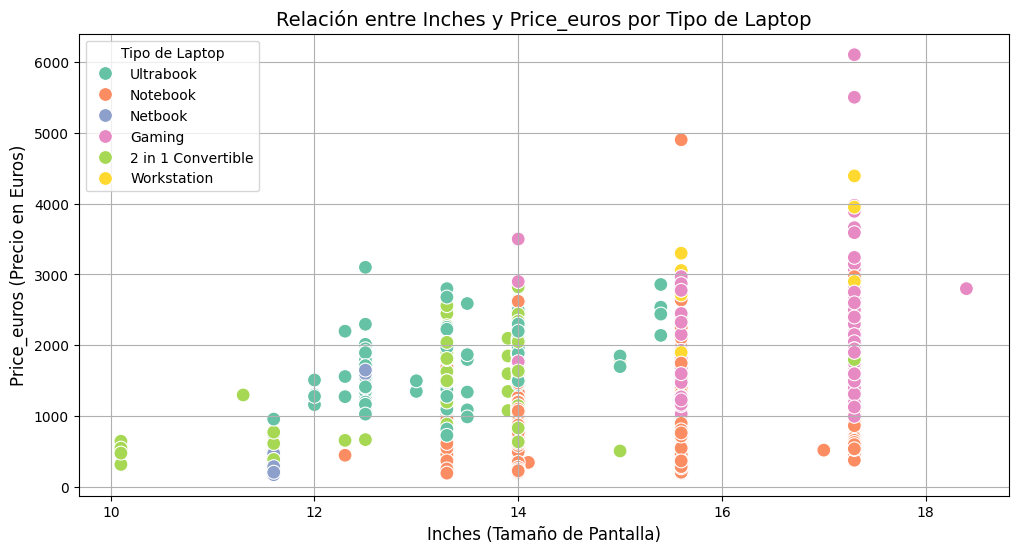

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# 1. Diagrama de dispersión: Inches vs Price_euros
plt.figure(figsize=(12, 6))
sns.scatterplot(data=laptop_data, x="Inches", y="Price_euros", hue="TypeName", palette="Set2", s=100)
plt.title("Relación entre Inches y Price_euros por Tipo de Laptop", fontsize=14)
plt.xlabel("Inches (Tamaño de Pantalla)", fontsize=12)
plt.ylabel("Price_euros (Precio en Euros)", fontsize=12)
plt.legend(title="Tipo de Laptop")
plt.grid(True)
plt.show()



**Gráfico de dispersión**
  - Laptops con tamaños más pequeños (menores a 13") parecen tener precios más bajos, aunque existen excepciones, como ciertos dispositivos `Gaming` o `Workstation`.
  - En los tamaños medianos (13-15"), los precios muestran una mayor dispersión, reflejando una combinación de laptops más costosas (principalmente `Gaming` y `Workstation`) junto con dispositivos más accesibles (`Notebook`, `Ultrabook`).
  - Las laptops con pantallas grandes (>15") también tienen precios variados, aunque hay un grupo de precios más bajos dominado por `Notebook` y `Ultrabook`. Y las laptops `Gaming` predominan con precios muy elevados

**Conclusiones**
1. **Relación inversa con `Inches`**:
   - La tendencia general muestra que los precios no siempre aumentan con el tamaño de la pantalla. De hecho, las laptops grandes tienen una media de precios similar a las pequeñas, lo que sugiere que otros factores (como el tipo de laptop o el hardware interno) son más influyentes.

2. **Tipo de Laptop**:
   - Los dispositivos `Gaming` y `Workstation` parecen ser los más costosos en cualquier tamaño de pantalla, mientras que `Notebook` y `Ultrabook` dominan los rangos de precios más accesibles.

In [44]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Supongamos que los datos están cargados previamente en un DataFrame llamado `laptop_data`.

# Crear la columna 'Inches_Group' si no existe
bins = [0, 13, 15, float('inf')]
labels = ["Pequeña (<13\")", "Mediana (13-15\")", "Grande (>15\")"]

if 'Inches_Group' not in laptop_data.columns:
    laptop_data['Inches_Group'] = pd.cut(laptop_data['Inches'], bins=bins, labels=labels, right=False)

# Aseguramos que 'Inches_Group' sea categórica con el orden correcto
laptop_data['Inches_Group'] = pd.Categorical(laptop_data['Inches_Group'], categories=labels)

# Ajustamos el modelo ANOVA
modelo = ols('Price_euros ~ C(Inches_Group)', data=laptop_data).fit()
anova_resultados = anova_lm(modelo)

# Mostramos los resultados del ANOVA
print(anova_resultados)


                     df        sum_sq       mean_sq          F   PR(>F)
C(Inches_Group)     2.0  1.122794e+07  5.613970e+06  11.623147  0.00001
Residual         1272.0  6.143749e+08  4.829992e+05        NaN      NaN


**Conclusión estadística:**

- El valor p **0.00001** sugiere que las diferencias en los precios (`Price_euros`) entre los grupos de tamaños de pantalla (`Inches_Group`) son estadísticamente significativas. Esto significa que, en promedio, al menos uno de los grupos tiene un precio significativamente diferente al resto.

**Implicaciones prácticas:**
- `Influencia del tamaño de la pantalla en el precio:`

  Los resultados indican que el tamaño de la pantalla (agrupado en Pequeña, Mediana y Grande) afecta significativamente el precio de las laptops.
  
- `Varianza dentro de los grupos:`

  Aunque el modelo muestra diferencias significativas, la suma de cuadrados residual (6.143749e+08) es mucho mayor que la suma de cuadrados entre grupos (1.122794e+07), lo que indica que todavía hay una gran parte de la varianza en los precios que no está explicada solo por el tamaño de la pantalla. Otros factores, como la marca, el procesador, la memoria RAM, etc., probablemente también influyen en el precio.


In [45]:
# Importamos la función para análisis post hoc de Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizamos la prueba de Tukey para las comparaciones entre grupos de Inches_Group
tukey_resultados = pairwise_tukeyhsd(
    endog=laptop_data['Price_euros'],  # Variable dependiente (precios)
    groups=laptop_data['Inches_Group'],  # Grupos categóricos (tamaños de pantalla)
    alpha=0.05  # Nivel de significancia
)

# Mostramos los resultados del análisis de Tukey
tukey_resultados.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
"Grande (>15"")","Mediana (13-15"")",205.7189,0.0,103.4178,308.0201,True
"Grande (>15"")","Pequeña (<13"")",-13.2276,0.9846,-198.0556,171.6004,False
"Mediana (13-15"")","Pequeña (<13"")",-218.9465,0.0235,-414.2634,-23.6296,True


Los resultados del análisis post hoc utilizando la prueba de Tukey indican lo siguiente:

1. **Comparación entre "Grande (>15") y "Mediana (13-15")**:
   - **p-ajustada (p-adj):** 0.0 (significativo)
   - **Conclusión:** Existe una diferencia estadísticamente significativa en el precio medio entre laptops "Grandes (>15") y "Medianas (13-15")". Esto implica que el precio promedio de laptops grandes es significativamente mayor al de las medianas.

2. **Comparación entre "Grande (>15") y "Pequeña (<13")**:
   - **p-ajustada (p-adj):** 0.9846 (no significativo)
   - **Conclusión:** No hay evidencia de una diferencia estadísticamente significativa en el precio medio entre laptops "Grandes (>15") y "Pequeñas (<13")". Las medias parecen ser similares.

3. **Comparación entre "Mediana (13-15") y "Pequeña (<13")**:
   - **p-ajustada (p-adj):** 0.0235 (significativo)
   - **Conclusión:** Existe una diferencia estadísticamente significativa en el precio medio entre laptops "Medianas (13-15") y "Pequeñas (<13")". Las laptops pequeñas tienen precios promedio significativamente más bajos que las medianas.

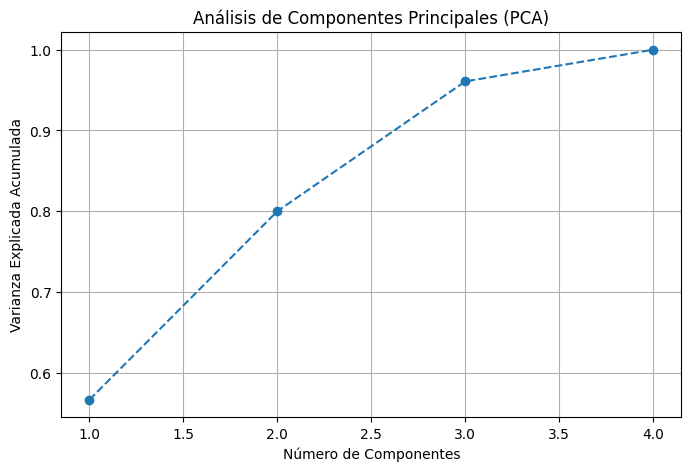

Componente Principal 1: 56.64% de la varianza explicada
Componente Principal 2: 23.36% de la varianza explicada
Componente Principal 3: 16.08% de la varianza explicada
Componente Principal 4: 3.93% de la varianza explicada


In [47]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seleccionar las variables numéricas relevantes
variables_numericas = ['Ram', 'CPU_freq', 'Weight', 'Inches']
X = laptop_data[variables_numericas]

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Proporción de varianza explicada
varianza_explicada = pca.explained_variance_ratio_

# Visualizar la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada.cumsum(), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Análisis de Componentes Principales (PCA)')
plt.grid()
plt.show()

# Resultados del PCA
for i, ratio in enumerate(varianza_explicada):
    print(f"Componente Principal {i+1}: {ratio:.2%} de la varianza explicada")
